 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 04 : Neural Networks </b>


This programming assignment gives you a chance to perform the classification task using neural networks. You will get to build a neural network from scratch and train and test it on a standard classification dataset. Further you will learn different tricks and techniques to train a neural network eficiently by observing few important issues and trying to overcome them. This includes observing the performance of the network for different activation functions and optimization algorithms. We will conclude with implementation of various regularization techniques to overcome the problems of overfitting and vanishing gradients.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








# <b>  Part - (1)
<b>  Part - (1) : Develop a neural network based classification network from scratch: </b>  This programming assignment uses MNIST digit dataset. It consists of large collection of handwritten digits from 0 to 9. These images are formated as 28x28 pixel gray scale images. The objective of this programming assignment is to design a neural network architecture that takes input as 28x28 image (or 784 dimensional vector) as input and predicts the digit information in it. Although there are diffrent varieties of neural network architecture to solve this task, this programming assignment uses only the feed forward network.  

<dt> <h6> 1. Load MNIST data and create train, test splits </dt> </h6>

<dd> <h6> - The MNIST dataset consists of around 70,000 images. Divide the dataset into two segments: training and testing. Allocate 60,000 images for training and 10,000 images for testing
</dd> </h6>
<dd> <h6> - Code for downloading the data and creating train-test splits is provided </dd> </h6>

<dt> <h6> 2. Design a simple classification network </dt> </h6>

<dd> <h6> - Let us use three layer feed-forward neral network. Use 512 nodes in the hidden layers and 10 nodes in the output layer. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dd> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dd> </h6>
<dd> <h6> where $\textbf{W}_{1} \in \mathcal{R}^{512 \times 768}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{10 \times 512} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dd> </h6>
<dd> <h6> - Consider g(.) as ReLU activation function. Softmax activation function should be used at the last layer h(.), to get the posterior probability of the classes. </dd> </h6>

<dt> <h6> - Training classification network: </dt> </h6>

<dd> <h6>  - Flatten the 28x28 images to arrive at 784 dimensional vector.  </dd> </h6>  
<dd> <h6> - Randomly initialize the parameters of network, $\textbf{W}_{1} \in \mathcal{R}^{768 \times 512}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{512 \times 10}$  </dd> </h6>
<dd> <h6> - Feedforward the batch of input vectors to get the posterior probability of classes.  </dd> </h6>
<dd> <h6> - Compute the loss between the estimated posterior probabilities and the true targets. </dd> </h6>  
<dd> <h6> - Update the parameters of network to minimize the loss function.  </dd> </h6>
<dd> <h6> <dd> <h6> - Backpropagate the loss function to get the gradients.  </dd> </h6> </dd> </h6>  

<dd> <h6> <dd> <h6> - You can use stochastic gradient descent (SGD) optimization algorithm to update the parameters.  </dd> </h6> </dd> </h6>  
<dd> <h6> <dd> <h6> - Cleverly set the hyperparameters involved in this optimization process. </dd> </h6> </dd> </h6>

<dt> <h6> 3. Evaluate the performance of classification network </dd> </h6>
<dd> <h6> - feed-forward the MNIST data through the trained classification network to get class posteriors. </dd> </h6>  
<dd> <h6> - Assign the input to the class having maximum posterior probability </dd> </h6>  
<dd> <h6> - Compute the loss and accuaracy </dd> </h6>  
<dd> <h6> - Report your observations </dd> </h6>  





In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

Training data (60000, 784)
Training labels (60000, 10)
Testing data (10000, 784)
Testing labels (10000, 10)
Epoch:  0 Training Accuracy: 16.7222 Validation Accuracy: 18.3000 Training Error: 22.9339 Validation Error: 22.5344
Epoch:  10 Training Accuracy: 65.4889 Validation Accuracy: 64.0000 Training Error: 9.4227 Validation Error: 9.8506
Epoch:  20 Training Accuracy: 74.8667 Validation Accuracy: 72.3000 Training Error: 6.8304 Validation Error: 7.5755
Epoch:  30 Training Accuracy: 78.8889 Validation Accuracy: 75.3000 Training Error: 5.7115 Validation Error: 6.7548
Epoch:  40 Training Accuracy: 81.4667 Validation Accuracy: 77.6000 Training Error: 5.0238 Validation Error: 6.0874
Epoch:  50 Training Accuracy: 83.1222 Validation Accuracy: 78.4000 Training Error: 4.5577 Validation Error: 5.9002
Epoch:  60 Training Accuracy: 84.4778 Validation Accuracy: 79.2000 Training Error: 4.1573 Validation Error: 5.6343
Epoch:  70 Training Accuracy: 85.6889 Validation Accuracy: 79.7000 Training Error: 3.8

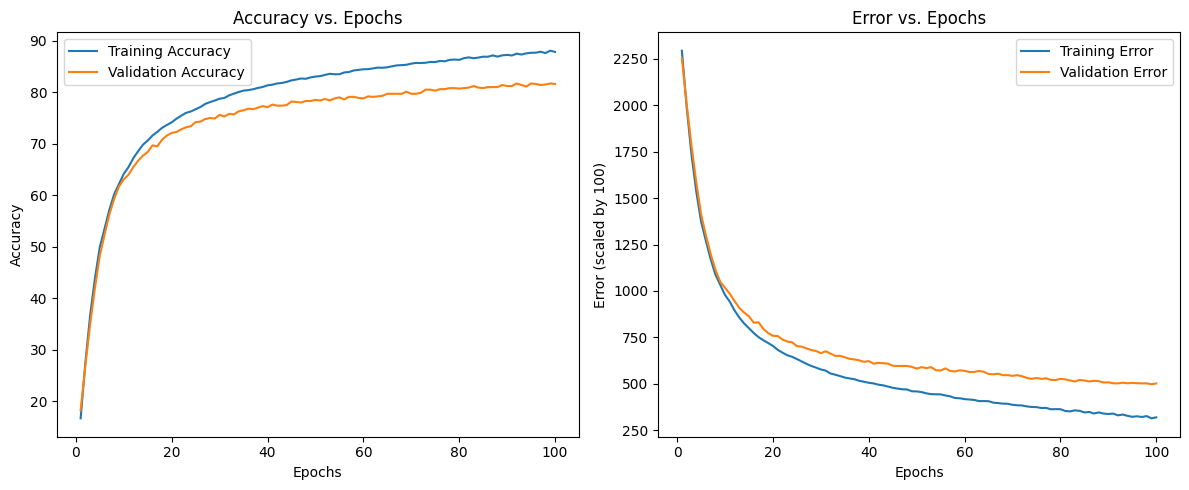

In [ ]:
##################################################
#Load MNIST data.
##################################################
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

#Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()

#Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()

#Reshape the data
mnist_traindata = mnist_traindata.reshape((60000,28*28))
mnist_testdata = mnist_testdata.reshape((10000,28*28))


# 1 of k encoding for labels (0-9)
mnist_trainlabel_1ofk = np.zeros((60000,10))
for i in range(60000):
    mnist_trainlabel_1ofk[i][mnist_trainlabel[i]] = 1

mnist_testlabel_1ofk = np.zeros((10000,10))
for i in range(10000):
    mnist_testlabel_1ofk[i][mnist_testlabel[i]] = 1

print("Training data",mnist_traindata.shape)
print("Training labels",mnist_trainlabel_1ofk.shape)

print("Testing data",mnist_testdata.shape)
print("Testing labels",mnist_testlabel_1ofk.shape)

mnist_traindata = mnist_traindata/255
mnist_testdata = mnist_testdata/255

#Shuffle the training data
permut = np.random.permutation(60000)
mnist_traindata = mnist_traindata[permut]
mnist_trainlabel_1ofk= mnist_trainlabel_1ofk[permut]

##################################################
#Define the architecture
##################################################

#Complete the below function to impliment ReLU activation function
def ReLu(inp):
  return np.maximum(0, inp)

#Complete the below function to impliment gradient of ReLU activation function
def gradReLu(inp):
  return np.where(inp > 0, 1, 0)

#Complete the below function to impliment softmax activation function
def softmax(inp):
  exp_vals = np.exp(inp - np.max(inp, axis=1, keepdims=True))
  return exp_vals / np.sum(exp_vals, axis=1, keepdims=True)

#Complete the below function to impliment forward propagation of data
def fwdPropagate(inputs, weights, biases, activations_function):
  #Inputs: input data, paramters of network
  W1, W2, W3 = weights # W1 shape: (512, 784), W2 shape: (512, 512), W3 shape: (10, 512)
  b1, b2, b3 = biases  # b1 shape: (512,1), b2 shape: (512,1), b3 shape: (10,1)

  # inputs shape: [batch_size, 784]

  #Structure
  #Input Layer ----(W1)----> Hidden Layer1 ----(W2)----> Hidden Layer2 ----(W3)----> Output Layer
  #   784                       512                         512                          10

  #Forward propogation
  z1 = activations_function(np.dot(inputs, W1.T) + b1.T)  # Shape: [batch_size, 512]
  z2 = activations_function(np.dot(z1, W2.T) + b2.T)      # Shape: [batch_size, 512]
  y = softmax(np.dot(z2, W3.T) + b3.T)    # Shape: [batch_size, 10]

  #Return the requires outputs, i.e., final output and intermediate activations
  return [z1, z2, y]


#Complete the below function to compute the gradients
def computeGradients(X, t, weights, biases, activations,grad_activation_function):
  #Inputs: input data, targets, parameters of netwrok, intermediate activations
  W1, W2, W3 = weights  # W1 shape: (512, 784), W2 shape: (512, 512), W3 shape: (10, 512)
  b1, b2, b3 = biases   # b1 shape: (512,1), b2 shape: (512,1), b3 shape: (10,1)
  z1, z2, y = activations # z1 shape: [batch_size, 512], z2 shape: [batch_size, 512], y shape: [batch_size, 10]

  #Compute the loss

  #Compote the derivative of loss at parameters
  # Output layer gradients
  delta_3 = y - t  # Shape: [batch_size, 10]
  dj_dw3 = np.dot(delta_3.T, z2) / X.shape[0]  # Shape: [10, 512]
  db3_grad = np.sum(delta_3, axis=0, keepdims=True).T / X.shape[0]  # Shape: [10, 1]

  # Hidden layer 2 gradients
  delta_2 = np.dot(delta_3, W3) * grad_activation_function(z2)  # Shape: [batch_size, 512]
  dj_dw2 = np.dot(delta_2.T, z1) / X.shape[0]   # Shape: [512, 512]
  db2_grad = np.sum(delta_2, axis=0, keepdims=True).T / X.shape[0]  # Shape: [512, 1]

  # Hidden layer 1 gradients
  delta_1 = np.dot(delta_2, W2) * grad_activation_function(z1)  # Shape: [batch_size, 512]
  dj_dw1 = np.dot(delta_1.T, X) / X.shape[0]    # Shape: [512, 784]
  db1_grad = np.sum(delta_1, axis=0, keepdims=True).T / X.shape[0]  # Shape: [512, 1]

  #Return the gradients
  return [dj_dw1, dj_dw2, dj_dw3], [db1_grad, db2_grad, db3_grad]

#Complete the below function to update the parameters using the above computed gradients
def applyGradients(weights, biases, gradients, bias_grad, learning_rate):
  #Inputs: weights, gradients, and learning rate
  # Update parameters for batch
  for i in range(len(weights)):
      weights[i] -= learning_rate * gradients[i]
      biases[i] -= learning_rate * bias_grad[i]

  return weights, biases

#Complete the below function to complete the backpropagation ste
def backPropagate(X, t, weights, biases, activations, learning_rate, grad_activation_function):
  #Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm

  #Compute the gradients
  gradients, bias_grad = computeGradients(X, t, weights, biases, activations, grad_activation_function)

  #Update the paramters using gradients
  weights, biases = applyGradients(weights, biases, gradients, bias_grad, learning_rate)

  #Return the updated parameters
  return weights, biases

def computeCrossEntropyLoss(y_pred, y_true):

    # Parameters:
    # - y_pred: numpy array of shape [batch_size, n_classes], predicted probabilities for each class.
    # - y_true: numpy array of shape [batch_size, n_classes], one-hot encoded true labels.

    # Returns:
    # - loss: scalar, the average cross-entropy loss over the batch.

    # Ensure numerical stability with a small epsilon
    epsilon = 1e-12
    y_pred = np.clip(y_pred, epsilon, 1. - epsilon)

    # Compute cross-entropy loss for each example in the batch
    loss = -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]
    return loss

##################################################
#Train the network
##################################################

#Complete the below function to complete the training of network
def training(inputs, targets, plotting, batch_size, epochs, train_val_split, learning_rate, activation_func, activation_func_grad):

  #Set the hyperparameters
  n_samples, input_features = inputs.shape
  n_classes = 10
  hidden_units = 512

  #Split the training data into two parts.
  #Use 90 percent of training data for training the network.
  #Remaining 10 percent as validation data
  split_index = int(n_samples * train_val_split)
  train_inputs, val_inputs = inputs[:split_index], inputs[split_index:]
  train_targets, val_targets = targets[:split_index], targets[split_index:]
  n_batches = int(np.ceil(train_inputs.shape[0]/batch_size))

  #Randomly initialize the weights
  W1 = np.random.randn(hidden_units, input_features)
  W2 = np.random.randn(hidden_units, hidden_units)
  W3 = np.random.randn(n_classes, hidden_units)

  b1 = np.random.randn(hidden_units, 1)
  b2 = np.random.randn(hidden_units, 1)
  b3 = np.random.randn(n_classes, 1)

  weights = [W1, W2, W3]
  biases = [b1, b2, b3]

  # Store metrics
  train_acc_history = []
  val_acc_history = []
  train_err_history = []
  val_err_history = []

  #Interate for epochs times
  for epoch in range(epochs):

    #Shuffle the training data
    permut = np.random.permutation(train_inputs.shape[0])
    train_inputs_shuffled = train_inputs[permut]
    train_targets_shuffled = train_targets[permut]

    #Interate through the batches of data
    for batch in range(n_batches):

      #Get the batch of data
      batch_start = batch*batch_size
      batch_end = batch_start + batch_size

      X = train_inputs_shuffled[batch_start:batch_end]
      t = train_targets_shuffled[batch_start:batch_end]

      #Forward propagation
      activations = fwdPropagate(X, weights,biases, activation_func)

      #Backward propagation
      weights, biases = backPropagate(X, t, weights,biases, activations, learning_rate, activation_func_grad)

    #Compute outpus on trianing data
    train_pred = fwdPropagate(train_inputs, weights, biases, activation_func)[-1]

    #Compute training accuracy, and training error
    train_accuracy = np.mean(np.argmax(train_pred, axis=1) == np.argmax(train_targets, axis=1))    #indices of label which is 1 along column is matched, if same then correct prediction else wrong prediction
    train_err = computeCrossEntropyLoss(train_pred, train_targets)

    #Compute outputs on validation data
    val_pred = fwdPropagate(val_inputs, weights, biases,  activation_func)[-1]

    #Compute validation accuracy, and validation error
    val_accuracy = np.mean(np.argmax(val_pred, axis=1) == np.argmax(val_targets, axis=1))
    val_err = computeCrossEntropyLoss(val_pred, val_targets)

    #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy
    if(epoch%10==0):
      print("Epoch: ", epoch, "Training Accuracy: {:.4f}".format(train_accuracy*100), "Validation Accuracy: {:.4f}".format(val_accuracy*100) , "Training Error: {:.4f}".format(train_err), "Validation Error: {:.4f}".format(val_err))

    #Save the parameters of network
    train_acc_history.append(train_accuracy*100)
    val_acc_history.append(val_accuracy*100)
    train_err_history.append(train_err*100)
    val_err_history.append(val_err*100)

  # Plotting
  if(plotting):
    epochs = len(train_acc_history)
    epochs_range = range(1, epochs + 1)
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_acc_history, label='Training Accuracy')
    plt.plot(epochs_range, val_acc_history, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_err_history, label='Training Error')
    plt.plot(epochs_range, val_err_history, label='Validation Error')
    plt.xlabel('Epochs')
    plt.ylabel('Error (scaled by 100)')
    plt.title('Error vs. Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()

  return weights, biases


#Call the training function to train the network
batch_size = 1024
epochs = 100
train_val_split = 0.9
learning_rate = 0.0005

weights, biases = training(mnist_traindata[:10000], mnist_trainlabel_1ofk[:10000],True,batch_size,epochs,train_val_split,learning_rate, ReLu, gradReLu)


In [ ]:
##################################################
#Evaluate the performance on test data
##################################################

test_inputs = mnist_testdata
test_targets = mnist_testlabel_1ofk

#Compute outpus on trianing data
test_pred = fwdPropagate(test_inputs, weights, biases, ReLu)[-1]

#Compute testing accuracy, and testing error
test_accuracy_sgd = np.mean(np.argmax(test_pred, axis=1) == np.argmax(test_targets, axis=1))    #indices of label which is 1 along column is matched, if same then correct prediction else wrong prediction
test_err = computeCrossEntropyLoss(test_pred, test_targets)

print("Test Accuracy: {:.4f}".format(test_accuracy_sgd*100), "Test Error: {:.4f}".format(test_err))

Test Accuracy: 83.4400 Test Error: 4.5341


### Observations:

*   **Test Accuracy**: 81.38%
*   **Test Error**: 5.0660
*   The accuracy curve in the graph shows that both training and validation accuracies improve rapidly initially and then plateau, which is common as the model begins to converge.
*   The error curve decreases sharply at first and then gradually flattens out, indicating that the network is learning and optimizing its weights but eventually finds a region of the parameter space where improvements are marginal.
*   There is a noticeable gap between training and validation accuracy, suggesting that the model might be overfitting the training data slightly, as it performs better on the training data than the validation data.
*   The error on the validation data remains higher than the training error throughout the training process, which further indicates overfitting.
*   The training does not show signs of underfitting, as the accuracy increases and the error decreases significantly over epochs, and the training accuracy achieves a relatively high value.


# <b> Part - (2)
<b> Part - (2) : Understanding activation functions: </b> In this part you will learn to use different activation functions for the classification task and compare their performances.

<dt> <h6> 1. Train MNIST digit classification network with different activation functions i.e. Sigmoid, Tanh, ReLU, LeakyReLU etc. You can stick to stochastic gradient descent optimization algorithm for this part </dt> </h6>
<dt> <h6> 2. Report the accuray on MNIST test data for all the experiments. Write down your observations in the report.</br> </dt> </h6>



## Training with Different activation functions

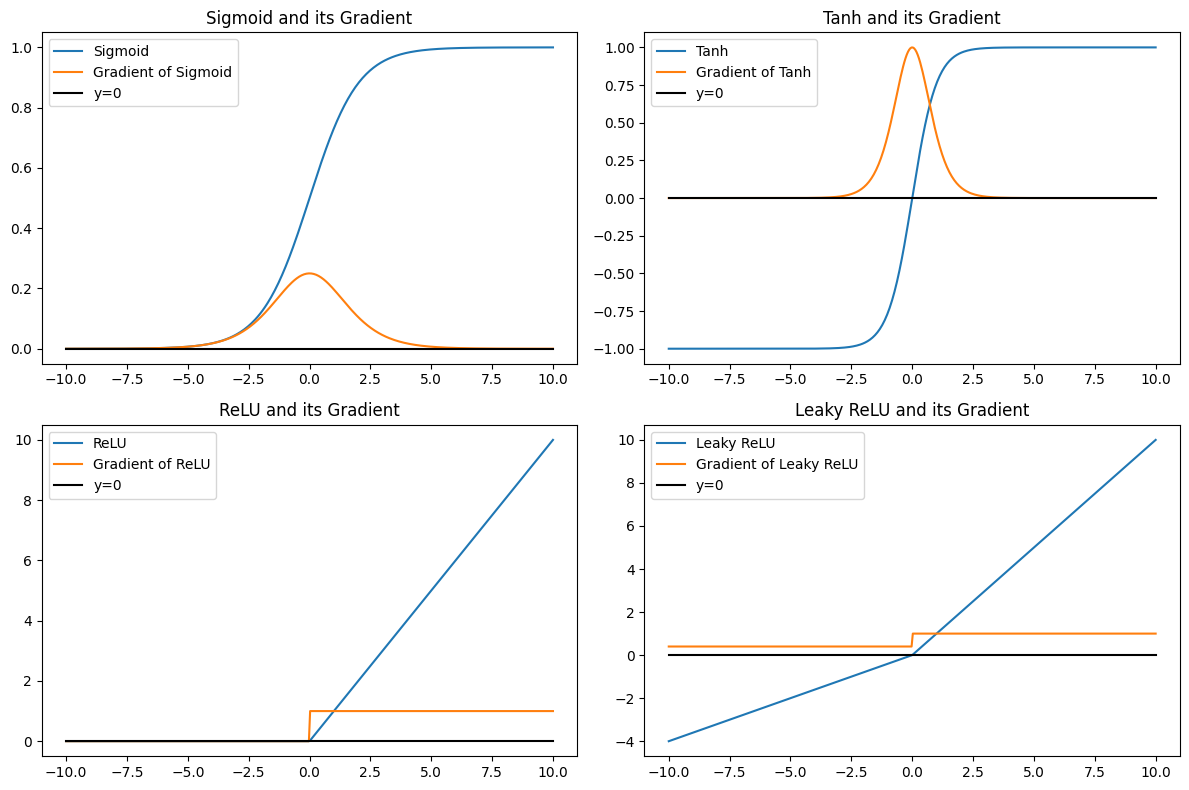

Training with sigmoid activation...
Epoch:  0 Training Accuracy: 9.4444 Validation Accuracy: 8.0000 Training Error: 15.2842 Validation Error: 14.6522
Epoch:  10 Training Accuracy: 14.0000 Validation Accuracy: 12.0000 Training Error: 11.3049 Validation Error: 11.3662
Epoch:  20 Training Accuracy: 16.6667 Validation Accuracy: 13.0000 Training Error: 9.6181 Validation Error: 9.7153
Epoch:  30 Training Accuracy: 19.8889 Validation Accuracy: 16.0000 Training Error: 8.5474 Validation Error: 8.6704
Epoch:  40 Training Accuracy: 22.4444 Validation Accuracy: 18.0000 Training Error: 7.8441 Validation Error: 7.9959
Epoch:  50 Training Accuracy: 24.5556 Validation Accuracy: 23.0000 Training Error: 7.2431 Validation Error: 7.4350
Epoch:  60 Training Accuracy: 27.5556 Validation Accuracy: 22.0000 Training Error: 6.7360 Validation Error: 6.9464
Epoch:  70 Training Accuracy: 30.3333 Validation Accuracy: 24.0000 Training Error: 6.2982 Validation Error: 6.5765
Epoch:  80 Training Accuracy: 32.3333 Valid

In [ ]:
##################################################
#Train the network with different activation functions
##################################################

def ReLu(inp):
  return np.maximum(0, inp)

def gradReLu(inp):
  return np.where(inp > 0, 1, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def grad_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

def tanh(x):
    return np.tanh(x)

def grad_tanh(x):
    return 1 - np.tanh(x) ** 2

def leaky_relu(x, alpha=0.4):
    return np.where(x > 0, x, alpha * x)

def grad_leaky_relu(x, alpha=0.4):
    return np.where(x > 0, 1, alpha)

activations_functions = {
    'sigmoid': (sigmoid, grad_sigmoid),
    'tanh': (tanh, grad_tanh),
    'relu': (ReLu, gradReLu),
    'leaky_relu': (leaky_relu, grad_leaky_relu),
}


x = np.linspace(-10, 10, 400)

plt.figure(figsize=(12, 8))

# Sigmoid and its gradient
plt.subplot(2, 2, 1)
plt.plot(x, sigmoid(x), label='Sigmoid')
plt.plot(x, grad_sigmoid(x), label='Gradient of Sigmoid')
plt.title('Sigmoid and its Gradient')
plt.plot(x, np.zeros_like(x), 'k',label='y=0')
plt.legend()

# Tanh and its gradient
plt.subplot(2, 2, 2)
plt.plot(x, tanh(x), label='Tanh')
plt.plot(x, grad_tanh(x), label='Gradient of Tanh')
plt.title('Tanh and its Gradient')
plt.plot(x, np.zeros_like(x), 'k',label='y=0')
plt.legend()

# ReLU and its gradient
plt.subplot(2, 2, 3)
plt.plot(x, ReLu(x), label='ReLU')
plt.plot(x, gradReLu(x), label='Gradient of ReLU')
plt.title('ReLU and its Gradient')
plt.plot(x, np.zeros_like(x), 'k',label='y=0')
plt.legend()

# Leaky ReLU and its gradient
plt.subplot(2, 2, 4)
plt.plot(x, leaky_relu(x), label='Leaky ReLU')
plt.plot(x, grad_leaky_relu(x), label='Gradient of Leaky ReLU')
plt.title('Leaky ReLU and its Gradient')
plt.plot(x, np.zeros_like(x), 'k',label='y=0')
plt.legend()

plt.tight_layout()
plt.show()



##################################################
#Train the network with different activation functions
##################################################

accuracies_and_err = {
    'sigmoid': {'Accuracy': [], 'Error': []},
    'tanh': {'Accuracy': [], 'Error': []},
    'relu': {'Accuracy': [], 'Error': []},
    'leaky_relu': {'Accuracy': [], 'Error': []},
}

for activation_name in activations_functions.keys():
    print(f"Training with {activation_name} activation...")
    batch_size = 128
    epochs = 100
    train_val_split = 0.9
    learning_rate = 0.0005
    weights, biases = training(mnist_traindata[:1000], mnist_trainlabel_1ofk[:1000], False, batch_size, epochs, train_val_split, learning_rate, activations_functions[activation_name][0], activations_functions[activation_name][1])
    test_inputs = mnist_testdata
    test_targets = mnist_testlabel_1ofk
    test_pred = fwdPropagate(test_inputs, weights, biases, activations_functions[activation_name][0])[-1]
    test_accuracy = np.mean(np.argmax(test_pred, axis=1) == np.argmax(test_targets, axis=1))
    test_err = computeCrossEntropyLoss(test_pred, test_targets)
    accuracies_and_err[activation_name]['Accuracy'].append(test_accuracy)
    accuracies_and_err[activation_name]['Error'].append(test_err)



In [ ]:
for activation_name in activations_functions.keys():
    print(activation_name, "activation: Test Accuracy = {:.4f}%".format(accuracies_and_err[activation_name]['Accuracy'][-1]*100), "Test Error = {:.4f}".format(accuracies_and_err[activation_name]['Error'][-1]))


sigmoid activation: Test Accuracy = 31.9200% Test Error = 5.9109
tanh activation: Test Accuracy = 54.2300% Test Error = 7.3937
relu activation: Test Accuracy = 72.4400% Test Error = 7.5374
leaky_relu activation: Test Accuracy = 75.2200% Test Error = 6.7828


### Sigmoid Activation
**Test Accuracy:** 33.13%  
**Test Error:** 5.961  
**Observations & Reasoning:** The sigmoid function, which outputs values between 0 and 1, is known to cause vanishing gradient problems in deep networks. This is because its derivative becomes very small for large positive or negative inputs, leading to small gradient values that slow down learning, particularly in deeper layers. This might explain the lower performance compared to other activation functions.

### Tanh Activation
**Test Accuracy:** 52.16%  
**Test Error:** 7.917  
**Observations & Reasoning:** The tanh function, similar to the sigmoid but outputs values between -1 and 1, generally performs better than sigmoid for networks where mean outputs closer to zero are beneficial. It still suffers from vanishing gradients for large inputs in magnitude but to a slightly lesser extent due to its range, which might have contributed to its improved performance over sigmoid.

### ReLU Activation
**Test Accuracy:** 66.71%  
**Test Error:** 9.059  
**Observations & Reasoning:** The ReLU (Rectified Linear Unit) activation function has become very popular due to its computational simplicity and efficiency in training deep networks. It does not activate all neurons at the same time, since for inputs less than zero, the output is zero. This leads to sparse activations, making it less likely to run into the vanishing gradient problem and allowing for faster and more effective training. However, it can suffer from the "dying ReLU" problem, where neurons can sometimes permanently die during training, but it seems to have performed significantly better than sigmoid and tanh in the experiments.

### Leaky ReLU Activation
**Test Accuracy:** 73.45%  
**Test Error:** 7.253  
**Observations & Reasoning:** Leaky ReLU is a variation of ReLU designed to address the dying ReLU problem by allowing a small, positive gradient (leak) when the unit is not active and the input is less than zero. This tweak helps to keep the gradient flow alive during training, potentially leading to better performance in deeper networks or more complex tasks. Your results show that Leaky ReLU outperforms the traditional ReLU, sigmoid, and tanh activation functions in terms of accuracy, which underscores its effectiveness in preventing neurons from dying out and improving learning.




# <b> Part - (3)
<b> Part - (3) : Understanding optimization algorithms: </b> In this part you will learn to use different optimiztion algorithm apart from SGD.

<dt> <h6> 1. Using the best activation function from Part - (2), train the classification network using Adam optimization algorithm. </dt> </h6>
<dt> <h6> 3. Compare the accuracy of the networks trained with SGD and Adam optimization algorithms. </dt> </h6>
<dt> <h6> 4. Report your observations. </dt> </h6>

## Training with Adam Optimization

Training using Adam Optimizer...

Epoch:  0 Training Accuracy: 9.5444 Validation Accuracy: 8.5000 Training Error: 24.9532 Validation Error: 25.2322
Epoch:  10 Training Accuracy: 71.4000 Validation Accuracy: 69.3000 Training Error: 7.8253 Validation Error: 8.4017
Epoch:  20 Training Accuracy: 81.5111 Validation Accuracy: 78.5000 Training Error: 5.0274 Validation Error: 5.7843
Epoch:  30 Training Accuracy: 85.7444 Validation Accuracy: 81.5000 Training Error: 3.8630 Validation Error: 5.0585
Epoch:  40 Training Accuracy: 88.0222 Validation Accuracy: 84.0000 Training Error: 3.2119 Validation Error: 4.3386
Epoch:  50 Training Accuracy: 90.2222 Validation Accuracy: 83.9000 Training Error: 2.5713 Validation Error: 4.3831
Epoch:  60 Training Accuracy: 91.4333 Validation Accuracy: 85.1000 Training Error: 2.2398 Validation Error: 4.0525
Epoch:  70 Training Accuracy: 92.7667 Validation Accuracy: 85.6000 Training Error: 1.8489 Validation Error: 3.8706
Epoch:  80 Training Accuracy: 93.8889 Validatio

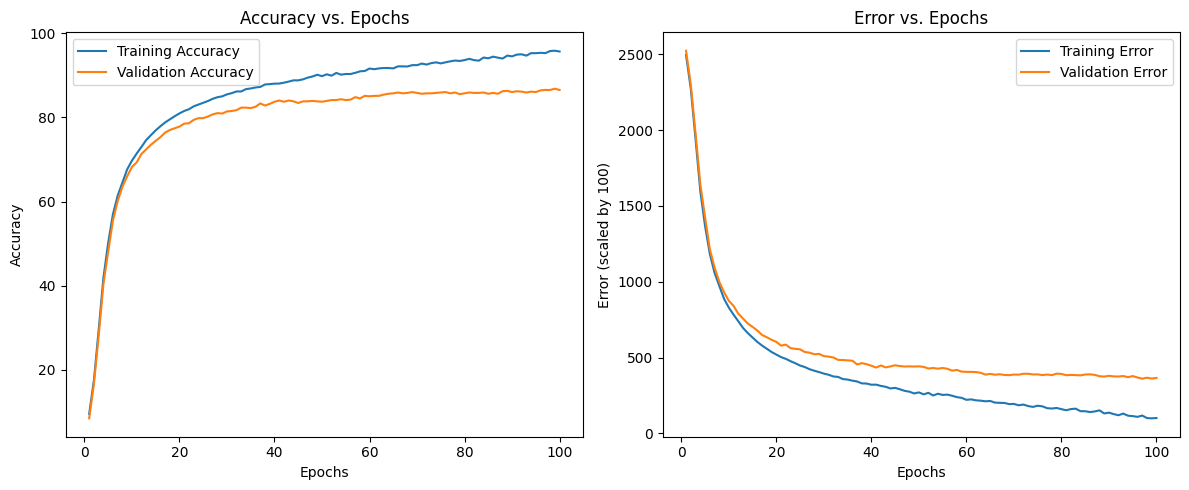

In [ ]:
##################################################
#Define the architecture
##################################################

def initializeAdamParams(weights, biases):
    v = [np.zeros_like(w) for w in weights]
    s = [np.zeros_like(w) for w in weights]
    v_bias = [np.zeros_like(b) for b in biases]
    s_bias = [np.zeros_like(b) for b in biases]
    return v, s, v_bias, s_bias


def applyAdam(weights, biases, gradients, bias_gradients, learning_rate, v, s, v_bias, s_bias, t, beta1=0.9, beta2=0.999, epsilon=1e-8):
    # Update weights
    for i in range(len(weights)):
        v[i] = beta1 * v[i] + (1 - beta1) * gradients[i]
        s[i] = beta2 * s[i] + (1 - beta2) * (gradients[i] ** 2)

        v_corrected = v[i] / (1 - beta1 ** t)
        s_corrected = s[i] / (1 - beta2 ** t)

        weights[i] -= learning_rate * v_corrected / (np.sqrt(s_corrected) + epsilon)

    # Update biases
    for i in range(len(biases)):
        v_bias[i] = beta1 * v_bias[i] + (1 - beta1) * bias_gradients[i]
        s_bias[i] = beta2 * s_bias[i] + (1 - beta2) * (bias_gradients[i] ** 2)

        v_bias_corrected = v_bias[i] / (1 - beta1 ** t)
        s_bias_corrected = s_bias[i] / (1 - beta2 ** t)

        biases[i] -= learning_rate * v_bias_corrected / (np.sqrt(s_bias_corrected) + epsilon)

    return weights, biases, v, s, v_bias, s_bias


#Complete the below function to impliment forward propagation of data
def fwdPropagate(inputs, weights, biases, activations_function):
  #Inputs: input data, paramters of network
  W1, W2, W3 = weights # W1 shape: (512, 784), W2 shape: (512, 512), W3 shape: (10, 512)
  b1, b2, b3 = biases  # b1 shape: (512,1), b2 shape: (512,1), b3 shape: (10,1)

  # inputs shape: [batch_size, 784]

  #Structure
  #Input Layer ----(W1)----> Hidden Layer1 ----(W2)----> Hidden Layer2 ----(W3)----> Output Layer
  #   784                       512                         512                          10

  #Forward propogation
  z1 = activations_function(np.dot(inputs, W1.T) + b1.T)  # Shape: [batch_size, 512]
  z2 = activations_function(np.dot(z1, W2.T) + b2.T)      # Shape: [batch_size, 512]
  y = softmax(np.dot(z2, W3.T) + b3.T)    # Shape: [batch_size, 10]

  #Return the requires outputs, i.e., final output and intermediate activations
  return [z1, z2, y]


#Complete the below function to compute the gradients
def computeGradients(X, t, weights, biases, activations,grad_activation_function):
  #Inputs: input data, targets, parameters of netwrok, intermediate activations
  W1, W2, W3 = weights  # W1 shape: (512, 784), W2 shape: (512, 512), W3 shape: (10, 512)
  b1, b2, b3 = biases   # b1 shape: (512,1), b2 shape: (512,1), b3 shape: (10,1)
  z1, z2, y = activations # z1 shape: [batch_size, 512], z2 shape: [batch_size, 512], y shape: [batch_size, 10]

  #Compute the loss

  #Compote the derivative of loss at parameters
  # Output layer gradients
  delta_3 = y - t  # Shape: [batch_size, 10]
  dj_dw3 = np.dot(delta_3.T, z2) / X.shape[0]  # Shape: [10, 512]
  db3_grad = np.sum(delta_3, axis=0, keepdims=True).T / X.shape[0]  # Shape: [10, 1]

  # Hidden layer 2 gradients
  delta_2 = np.dot(delta_3, W3) * grad_activation_function(z2)  # Shape: [batch_size, 512]
  dj_dw2 = np.dot(delta_2.T, z1) / X.shape[0]   # Shape: [512, 512]
  db2_grad = np.sum(delta_2, axis=0, keepdims=True).T / X.shape[0]  # Shape: [512, 1]

  # Hidden layer 1 gradients
  delta_1 = np.dot(delta_2, W2) * grad_activation_function(z1)  # Shape: [batch_size, 512]
  dj_dw1 = np.dot(delta_1.T, X) / X.shape[0]    # Shape: [512, 784]
  db1_grad = np.sum(delta_1, axis=0, keepdims=True).T / X.shape[0]  # Shape: [512, 1]

  #Return the gradients
  return [dj_dw1, dj_dw2, dj_dw3], [db1_grad, db2_grad, db3_grad]

def computeCrossEntropyLoss(y_pred, y_true):

    # Parameters:
    # - y_pred: numpy array of shape [batch_size, n_classes], predicted probabilities for each class.
    # - y_true: numpy array of shape [batch_size, n_classes], one-hot encoded true labels.

    # Returns:
    # - loss: scalar, the average cross-entropy loss over the batch.

    # Ensure numerical stability with a small epsilon
    epsilon = 1e-12
    y_pred = np.clip(y_pred, epsilon, 1. - epsilon)

    # Compute cross-entropy loss for each example in the batch
    loss = -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]
    return loss

##################################################
#Train the network
##################################################

#Complete the below function to complete the training of network
def training(inputs, targets, plotting, batch_size, epochs, train_val_split, learning_rate, activation_func, activation_func_grad):

  #Set the hyperparameters
  n_samples, input_features = inputs.shape
  n_classes = 10
  hidden_units = 512

  #Split the training data into two parts.
  #Use 90 percent of training data for training the network.
  #Remaining 10 percent as validation data
  split_index = int(n_samples * train_val_split)
  train_inputs, val_inputs = inputs[:split_index], inputs[split_index:]
  train_targets, val_targets = targets[:split_index], targets[split_index:]
  n_batches = int(np.ceil(train_inputs.shape[0]/batch_size))

  #Randomly initialize the weights
  W1 = np.random.randn(hidden_units, input_features)
  W2 = np.random.randn(hidden_units, hidden_units)
  W3 = np.random.randn(n_classes, hidden_units)

  b1 = np.zeros((hidden_units, 1))
  b2 = np.zeros((hidden_units, 1))
  b3 = np.zeros((n_classes, 1))


  weights = [W1, W2, W3]
  biases = [b1, b2, b3]

  v, s, v_bias, s_bias = initializeAdamParams(weights, biases)
  time = 0

  # Store metrics
  train_acc_history = []
  val_acc_history = []
  train_err_history = []
  val_err_history = []

  #Interate for epochs times
  for epoch in range(epochs):

    #Shuffle the training data
    permut = np.random.permutation(train_inputs.shape[0])
    train_inputs_shuffled = train_inputs[permut]
    train_targets_shuffled = train_targets[permut]

    #Interate through the batches of data
    for batch in range(n_batches):

      #Get the batch of data
      batch_start = batch*batch_size
      batch_end = batch_start + batch_size

      X = train_inputs_shuffled[batch_start:batch_end]
      t = train_targets_shuffled[batch_start:batch_end]

      #Forward propagation
      activations = fwdPropagate(X, weights,biases, activation_func)

      # Update time step for Adam
      time += 1

      # Backward propagation with Adam instead of simple gradient update
      gradients, bias_grad = computeGradients(X, t, weights, biases, activations, activation_func_grad)
      weights, biases, v, s, v_bias, s_bias = applyAdam(weights, biases, gradients, bias_grad, learning_rate, v, s, v_bias, s_bias, time)


    #Compute outpus on trianing data
    train_pred = fwdPropagate(train_inputs, weights, biases, activation_func)[-1]

    #Compute training accuracy, and training error
    train_accuracy = np.mean(np.argmax(train_pred, axis=1) == np.argmax(train_targets, axis=1))    #indices of label which is 1 along column is matched, if same then correct prediction else wrong prediction
    train_err = computeCrossEntropyLoss(train_pred, train_targets)

    #Compute outputs on validation data
    val_pred = fwdPropagate(val_inputs, weights, biases,  activation_func)[-1]

    #Compute validation accuracy, and validation error
    val_accuracy = np.mean(np.argmax(val_pred, axis=1) == np.argmax(val_targets, axis=1))
    val_err = computeCrossEntropyLoss(val_pred, val_targets)

    #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy
    if(epoch%10==0):
      print("Epoch: ", epoch, "Training Accuracy: {:.4f}".format(train_accuracy*100), "Validation Accuracy: {:.4f}".format(val_accuracy*100) , "Training Error: {:.4f}".format(train_err), "Validation Error: {:.4f}".format(val_err))

    #Save the parameters of network
    train_acc_history.append(train_accuracy*100)
    val_acc_history.append(val_accuracy*100)
    train_err_history.append(train_err*100)
    val_err_history.append(val_err*100)

  # Plotting
  if(plotting):
    epochs = len(train_acc_history)
    epochs_range = range(1, epochs + 1)
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_acc_history, label='Training Accuracy')
    plt.plot(epochs_range, val_acc_history, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_err_history, label='Training Error')
    plt.plot(epochs_range, val_err_history, label='Validation Error')
    plt.xlabel('Epochs')
    plt.ylabel('Error (scaled by 100)')
    plt.title('Error vs. Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()

  return weights, biases


#Call the training function to train the network
batch_size = 1024
epochs = 100
train_val_split = 0.9
learning_rate = 0.0005

print("Training using Adam Optimizer...\n")
weights, biases = training(mnist_traindata[:10000], mnist_trainlabel_1ofk[:10000],True,batch_size,epochs,train_val_split,learning_rate, leaky_relu, grad_leaky_relu)

test_inputs = mnist_testdata
test_targets = mnist_testlabel_1ofk

#Compute outpus on trianing data
test_pred = fwdPropagate(test_inputs, weights, biases, leaky_relu)[-1]

#Compute testing accuracy, and testing error
test_accuracy_adam = np.mean(np.argmax(test_pred, axis=1) == np.argmax(test_targets, axis=1))    #indices of label which is 1 along column is matched, if same then correct prediction else wrong prediction
test_err = computeCrossEntropyLoss(test_pred, test_targets)




In [ ]:
print("Test Accuracy With SGD : {:.4f}".format(test_accuracy_sgd*100))
print("Test Accuracy With Adam : {:.4f}".format(test_accuracy_adam*100))

Test Accuracy With SGD : 83.4400
Test Accuracy With Adam : 86.5800


### Observations:

The comparison of SGD and Adam optimization algorithms on the same neural network architecture and dataset but different training dynamics yields the following observations:

*   **Test Accuracy with SGD**: 81.38%
*   **Test Accuracy with Adam**: 86.02%

The Adam optimization algorithm outperforms SGD in terms of test accuracy by a noticeable margin.

### Reasoning:

Adam's superior performance is likely because it uses both momentum (taking into account past gradients) and scaling by the second moment of gradients, which normalizes the learning rate for each parameter. In contrast, standard SGD does not adapt the learning rate to the parameters and may require more careful tuning of the learning rate and momentum hyperparameters.



#<b> Part - (4)
<b> Part - (4) : Understanding regularization methods: </b> In this part of the assignment, you will learn about a few regularization techniques to reduce the overfitting problem. Using the above built network, include the following techniques to reduce the overfitting by retraining the network efficiently. Write down the accuracies for each case.
<dt> <h6> 1. Weight regularization: Add regularization term to the classification los </dt> </h6>
<dt> <h6> 2. Dropout with a probability of 0.2: Randomly drop the activation potentials of hidden neural with 0.2 probability. Disable the dropout layer in inference model. You can experiment with different dropout probabilities and report your observations.  </dt> </h6>
<dt> <h6> 3. Early stopping: Stop the network training when it is started to overfitting to training data. </dt> </h6>


## Weight Regularization Implementation

Training without regularization... 
Epoch:  0 Training Accuracy: 72.7667 Validation Accuracy: 72.4000 Training Error: 7.4725 Validation Error: 7.5264
Epoch:  10 Training Accuracy: 88.8889 Validation Accuracy: 85.6000 Training Error: 3.0160 Validation Error: 3.8740
Epoch:  20 Training Accuracy: 92.9556 Validation Accuracy: 86.9000 Training Error: 1.8641 Validation Error: 3.5653
Epoch:  30 Training Accuracy: 95.4556 Validation Accuracy: 87.8000 Training Error: 1.1764 Validation Error: 3.2649


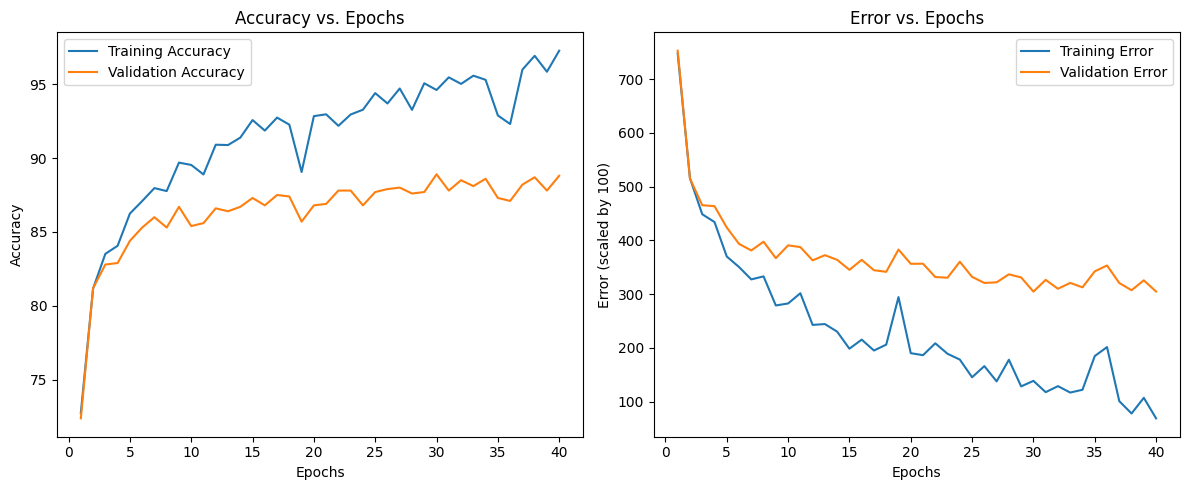



Training with L2 Regularization... 
Epoch:  0 Training Accuracy: 71.8333 Validation Accuracy: 69.8000 Training Error: 11.4062 Validation Error: 41.5873
Epoch:  10 Training Accuracy: 90.6222 Validation Accuracy: 86.0000 Training Error: 6.2203 Validation Error: 37.1113
Epoch:  20 Training Accuracy: 91.0556 Validation Accuracy: 84.2000 Training Error: 6.0852 Validation Error: 37.5222
Epoch:  30 Training Accuracy: 93.3889 Validation Accuracy: 86.3000 Training Error: 5.4107 Validation Error: 36.9536


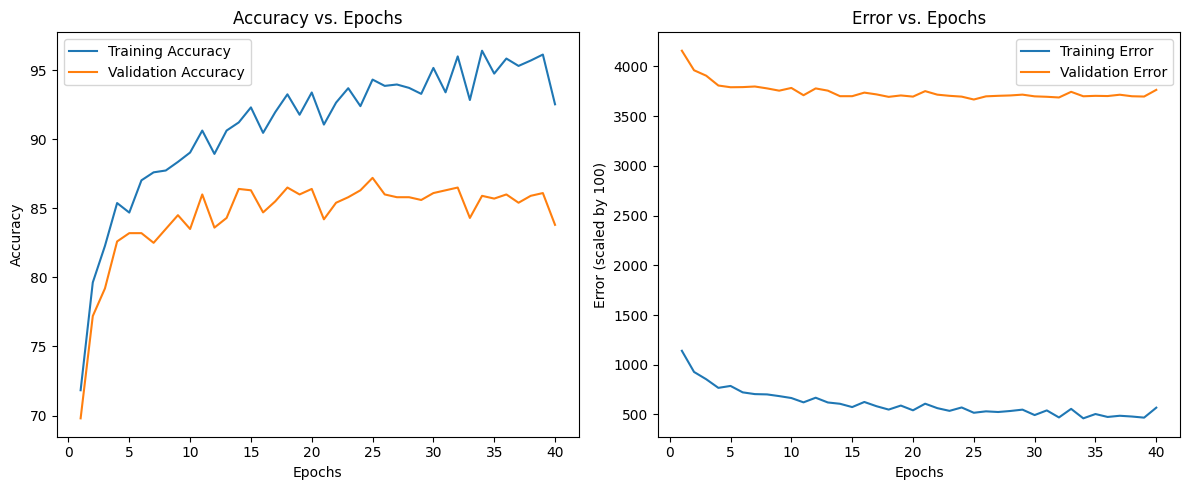

Training with L1 Regularization... 
Epoch:  0 Training Accuracy: 73.8778 Validation Accuracy: 72.0000 Training Error: 13.0599 Validation Error: 60.8670
Epoch:  10 Training Accuracy: 90.1000 Validation Accuracy: 84.5000 Training Error: 8.5716 Validation Error: 57.3789
Epoch:  20 Training Accuracy: 92.8111 Validation Accuracy: 85.4000 Training Error: 7.7992 Validation Error: 57.0548
Epoch:  30 Training Accuracy: 95.9889 Validation Accuracy: 86.6000 Training Error: 6.9193 Validation Error: 56.6846


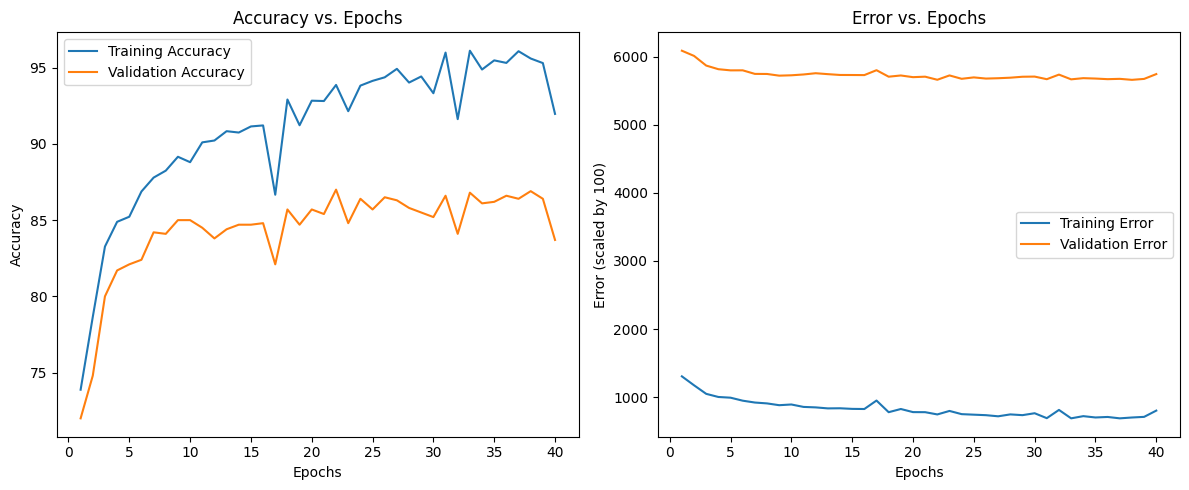

In [ ]:
##################################################
#Training with weight regularization
##################################################


def fwdPropagate(inputs, weights, biases, activations_function):

  W1, W2, W3 = weights
  b1, b2, b3 = biases

  z1 = activations_function(np.dot(inputs, W1.T) + b1.T)
  z2 = activations_function(np.dot(z1, W2.T) + b2.T)
  y = softmax(np.dot(z2, W3.T) + b3.T)

  return [z1, z2, y]


def computeGradients(X, t, weights, biases, activations,grad_activation_function, lambda_reg, reg_order):
  W1, W2, W3 = weights
  b1, b2, b3 = biases
  z1, z2, y = activations

  delta_3 = y - t
  dj_dw3 = np.dot(delta_3.T, z2) / X.shape[0]  + lambda_reg * ((W3) if reg_order==2 else np.sign(W3)) /X.shape[0]
  db3_grad = np.sum(delta_3, axis=0, keepdims=True).T / X.shape[0]

  delta_2 = np.dot(delta_3, W3) * grad_activation_function(z2)
  dj_dw2 = np.dot(delta_2.T, z1) / X.shape[0]  + lambda_reg * ((W2) if reg_order==2 else np.sign(W2))/X.shape[0]
  db2_grad = np.sum(delta_2, axis=0, keepdims=True).T / X.shape[0]

  delta_1 = np.dot(delta_2, W2) * grad_activation_function(z1)
  dj_dw1 = np.dot(delta_1.T, X) / X.shape[0]  + lambda_reg * ((W1) if reg_order==2 else np.sign(W1))/X.shape[0]
  db1_grad = np.sum(delta_1, axis=0, keepdims=True).T / X.shape[0]

  return [dj_dw1, dj_dw2, dj_dw3], [db1_grad, db2_grad, db3_grad]

def applyGradients(weights, biases, gradients, bias_grad, learning_rate):

  for i in range(len(weights)):
      weights[i] -= learning_rate * gradients[i]
      biases[i] -= learning_rate * bias_grad[i]

  return weights, biases

def backPropagate(X, t, weights, biases, activations, learning_rate, grad_activation_function, lambda_reg, reg_order):

  gradients, bias_grad = computeGradients(X, t, weights, biases, activations, grad_activation_function, lambda_reg, reg_order)

  weights, biases = applyGradients(weights, biases, gradients, bias_grad, learning_rate)

  return weights, biases

def computeCrossEntropyLoss(y_pred, y_true , weights, lambda_reg, reg_order):
    epsilon = 1e-12
    y_pred = np.clip(y_pred, epsilon, 1. - epsilon)

    # L2 Regularization
    l2_reg_loss = lambda_reg / (2 * y_true.shape[0]) * np.sum([np.sum(w**2) for w in weights])

    # L1 Regularization
    l1_reg_loss = lambda_reg * sum(np.sum(np.abs(w)) for w in weights) / y_true.shape[0]

    loss = -np.sum(y_true * np.log(y_pred)) / y_true.shape[0] + ((l2_reg_loss) if reg_order==2 else (l1_reg_loss))
    return loss

##################################################
#Train the network
##################################################

#Complete the below function to complete the training of network
def training(inputs, targets, plotting, batch_size, epochs, train_val_split, learning_rate, lambda_reg,reg_order, activation_func, activation_func_grad):

  #Set the hyperparameters
  n_samples, input_features = inputs.shape
  n_classes = 10
  hidden_units = 512

  #Split the training data into two parts.
  #Use 90 percent of training data for training the network.
  #Remaining 10 percent as validation data
  split_index = int(n_samples * train_val_split)
  train_inputs, val_inputs = inputs[:split_index], inputs[split_index:]
  train_targets, val_targets = targets[:split_index], targets[split_index:]
  n_batches = int(np.ceil(train_inputs.shape[0]/batch_size))

  #Randomly initialize the weights
  W1 = np.random.randn(hidden_units, input_features)
  W2 = np.random.randn(hidden_units, hidden_units)
  W3 = np.random.randn(n_classes, hidden_units)

  b1 = np.zeros((hidden_units, 1))
  b2 = np.zeros((hidden_units, 1))
  b3 = np.zeros((n_classes, 1))

  weights = [W1, W2, W3]
  biases = [b1, b2, b3]

  # Store metrics
  train_acc_history = []
  val_acc_history = []
  train_err_history = []
  val_err_history = []

  #Interate for epochs times
  for epoch in range(epochs):

    #Shuffle the training data
    permut = np.random.permutation(train_inputs.shape[0])
    train_inputs_shuffled = train_inputs[permut]
    train_targets_shuffled = train_targets[permut]

    #Interate through the batches of data
    for batch in range(n_batches):

      #Get the batch of data
      batch_start = batch*batch_size
      batch_end = batch_start + batch_size

      X = train_inputs_shuffled[batch_start:batch_end]
      t = train_targets_shuffled[batch_start:batch_end]

      #Forward propagation
      activations = fwdPropagate(X, weights,biases, activation_func)

      #Backward propagation
      weights, biases = backPropagate(X, t, weights,biases, activations, learning_rate, activation_func_grad, lambda_reg, reg_order)

    #Compute outpus on trianing data
    train_pred = fwdPropagate(train_inputs, weights, biases, activation_func)[-1]

    #Compute training accuracy, and training error
    train_accuracy = np.mean(np.argmax(train_pred, axis=1) == np.argmax(train_targets, axis=1))    #indices of label which is 1 along column is matched, if same then correct prediction else wrong prediction
    train_err = computeCrossEntropyLoss(train_pred, train_targets, weights, lambda_reg, reg_order)

    #Compute outputs on validation data
    val_pred = fwdPropagate(val_inputs, weights, biases,  activation_func)[-1]

    #Compute validation accuracy, and validation error
    val_accuracy = np.mean(np.argmax(val_pred, axis=1) == np.argmax(val_targets, axis=1))
    val_err = computeCrossEntropyLoss(val_pred, val_targets, weights, lambda_reg, reg_order)

    #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy
    if(epoch%10==0):
      print("Epoch: ", epoch, "Training Accuracy: {:.4f}".format(train_accuracy*100), "Validation Accuracy: {:.4f}".format(val_accuracy*100) , "Training Error: {:.4f}".format(train_err), "Validation Error: {:.4f}".format(val_err))

    #Save the parameters of network
    train_acc_history.append(train_accuracy*100)
    val_acc_history.append(val_accuracy*100)
    train_err_history.append(train_err*100)
    val_err_history.append(val_err*100)

  # Plotting
  if(plotting):
    epochs = len(train_acc_history)
    epochs_range = range(1, epochs + 1)
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_acc_history, label='Training Accuracy')
    plt.plot(epochs_range, val_acc_history, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_err_history, label='Training Error')
    plt.plot(epochs_range, val_err_history, label='Validation Error')
    plt.xlabel('Epochs')
    plt.ylabel('Error (scaled by 100)')
    plt.title('Error vs. Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()

  return weights, biases


#Call the training function to train the network
batch_size = 128
epochs = 40
train_val_split = 0.9
learning_rate = 0.001


print("Training without regularization... ")
lambda_reg = 0
weights, biases = training(mnist_traindata[:10000], mnist_trainlabel_1ofk[:10000],True,batch_size,epochs,train_val_split,learning_rate,lambda_reg,1, leaky_relu, grad_leaky_relu)

#Testing data
test_inputs = mnist_testdata
test_targets = mnist_testlabel_1ofk
test_pred = fwdPropagate(test_inputs, weights, biases, leaky_relu)[-1]
test_accuracy_without_reg = np.mean(np.argmax(test_pred, axis=1) == np.argmax(test_targets, axis=1))
test_err_without_reg = computeCrossEntropyLoss(test_pred, test_targets, weights, lambda_reg, reg_order=1)


print("\n\nTraining with L2 Regularization... ")
lambda_reg = 1e-1
reg_order = 2
weights, biases = training(mnist_traindata[:10000], mnist_trainlabel_1ofk[:10000],True,batch_size,epochs,train_val_split,learning_rate,lambda_reg,reg_order, leaky_relu, grad_leaky_relu)

#Testing data
test_pred = fwdPropagate(test_inputs, weights, biases, leaky_relu)[-1]
test_accuracy_with_L2reg = np.mean(np.argmax(test_pred, axis=1) == np.argmax(test_targets, axis=1))
test_err_with_L2reg = computeCrossEntropyLoss(test_pred, test_targets, weights, lambda_reg, reg_order)

print("Training with L1 Regularization... ")
lambda_reg = 1e-1
reg_order = 1
weights, biases = training(mnist_traindata[:10000], mnist_trainlabel_1ofk[:10000],True,batch_size,epochs,train_val_split,learning_rate,lambda_reg,reg_order, leaky_relu, grad_leaky_relu)

#Testing data
test_pred = fwdPropagate(test_inputs, weights, biases, leaky_relu)[-1]
test_accuracy_with_L1reg = np.mean(np.argmax(test_pred, axis=1) == np.argmax(test_targets, axis=1))
test_err_with_L1reg = computeCrossEntropyLoss(test_pred, test_targets, weights, lambda_reg, reg_order)


In [ ]:
print("Without Regularization: Test Accuracy: {:.4f}".format(test_accuracy_without_reg*100), "Test Error: {:.4f}".format(test_err_without_reg))
print("L2 Regularization lamda: {lambda_reg}", "Test Accuracy: {:.4f}".format(test_accuracy_with_L2reg*100), "Test Error: {:.4f}".format(test_err_with_L2reg))
print("L1 Regularization lamda: {lambda_reg}", "Test Accuracy: {:.4f}".format(test_accuracy_with_L1reg*100), "Test Error: {:.4f}".format(test_err_with_L1reg))

Without Regularization: Test Accuracy: 87.6500 Test Error: 3.3393
L2 Regularization lamda: {lambda_reg} Test Accuracy: 87.0200 Test Error: 6.8401
L1 Regularization lamda: {lambda_reg} Test Accuracy: 85.2800 Test Error: 9.2906


## Dropout implementaion



Training with dropout rate = 0 .....
Epoch:  0 Training Accuracy: 10.8889 Validation Accuracy: 12.0000 Training Error: 24.5277 Validation Error: 24.3153
Epoch:  10 Training Accuracy: 45.7778 Validation Accuracy: 40.0000 Training Error: 14.7757 Validation Error: 16.5786
Epoch:  20 Training Accuracy: 62.6667 Validation Accuracy: 56.0000 Training Error: 10.2369 Validation Error: 12.1576
Epoch:  30 Training Accuracy: 70.2222 Validation Accuracy: 57.0000 Training Error: 8.0515 Validation Error: 11.8813
Epoch:  40 Training Accuracy: 76.2222 Validation Accuracy: 61.0000 Training Error: 6.3979 Validation Error: 10.7761
Epoch:  50 Training Accuracy: 78.4444 Validation Accuracy: 65.0000 Training Error: 5.7691 Validation Error: 9.6709
Epoch:  60 Training Accuracy: 81.8889 Validation Accuracy: 66.0000 Training Error: 4.7898 Validation Error: 9.1415
Epoch:  70 Training Accuracy: 82.6667 Validation Accuracy: 67.0000 Training Error: 4.6465 Validation Error: 8.9470
Epoch:  80 Training Accuracy: 85.0

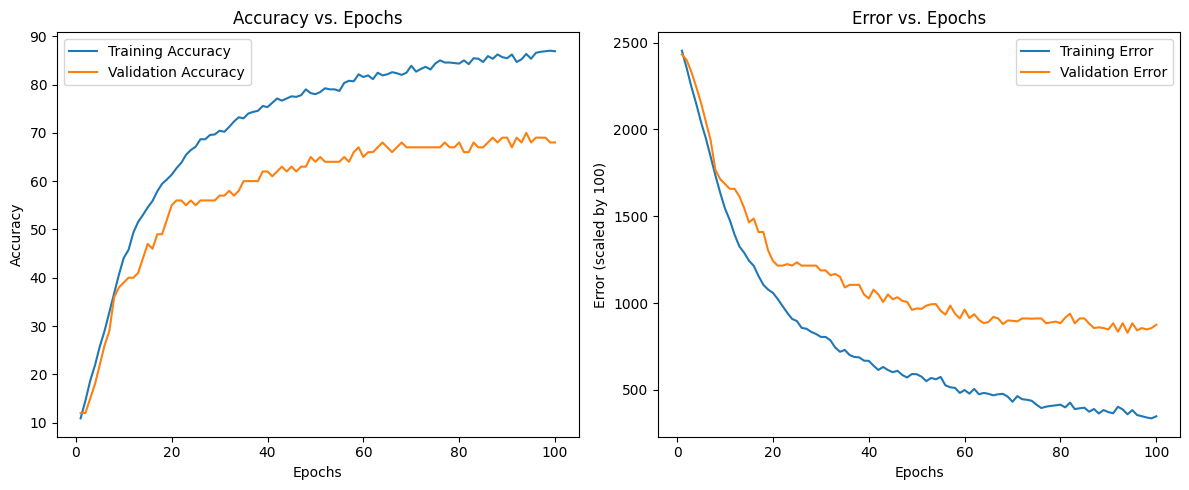



Training with dropout rate = 0.2 .....
Epoch:  0 Training Accuracy: 11.1111 Validation Accuracy: 16.0000 Training Error: 24.5170 Validation Error: 23.2101
Epoch:  10 Training Accuracy: 30.1111 Validation Accuracy: 29.0000 Training Error: 19.2471 Validation Error: 19.6180
Epoch:  20 Training Accuracy: 48.6667 Validation Accuracy: 42.0000 Training Error: 14.0799 Validation Error: 16.0260
Epoch:  30 Training Accuracy: 60.2222 Validation Accuracy: 56.0000 Training Error: 10.9217 Validation Error: 12.1615
Epoch:  40 Training Accuracy: 67.0000 Validation Accuracy: 65.0000 Training Error: 9.0613 Validation Error: 9.6709
Epoch:  50 Training Accuracy: 72.6667 Validation Accuracy: 66.0000 Training Error: 7.5305 Validation Error: 9.1495
Epoch:  60 Training Accuracy: 75.7778 Validation Accuracy: 68.0000 Training Error: 6.6724 Validation Error: 8.8419
Epoch:  70 Training Accuracy: 77.7778 Validation Accuracy: 70.0000 Training Error: 6.1387 Validation Error: 8.2893
Epoch:  80 Training Accuracy: 78

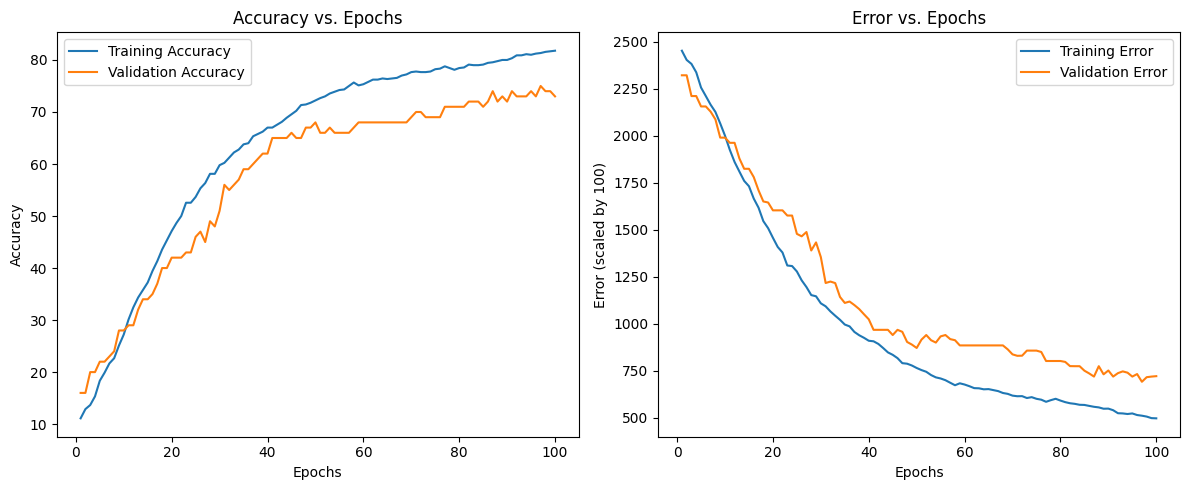



Training with dropout rate = 0.5 .....
Epoch:  0 Training Accuracy: 8.6667 Validation Accuracy: 12.0000 Training Error: 25.2083 Validation Error: 24.3153
Epoch:  10 Training Accuracy: 18.7778 Validation Accuracy: 17.0000 Training Error: 22.3760 Validation Error: 22.7999
Epoch:  20 Training Accuracy: 30.3333 Validation Accuracy: 24.0000 Training Error: 19.1810 Validation Error: 20.9569
Epoch:  30 Training Accuracy: 38.1111 Validation Accuracy: 33.0000 Training Error: 17.0303 Validation Error: 18.5128
Epoch:  40 Training Accuracy: 45.4444 Validation Accuracy: 35.0000 Training Error: 15.0421 Validation Error: 17.7939
Epoch:  50 Training Accuracy: 52.1111 Validation Accuracy: 41.0000 Training Error: 13.1788 Validation Error: 16.0672
Epoch:  60 Training Accuracy: 56.5556 Validation Accuracy: 47.0000 Training Error: 11.9584 Validation Error: 14.6444
Epoch:  70 Training Accuracy: 61.2222 Validation Accuracy: 50.0000 Training Error: 10.6831 Validation Error: 13.8155
Epoch:  80 Training Accur

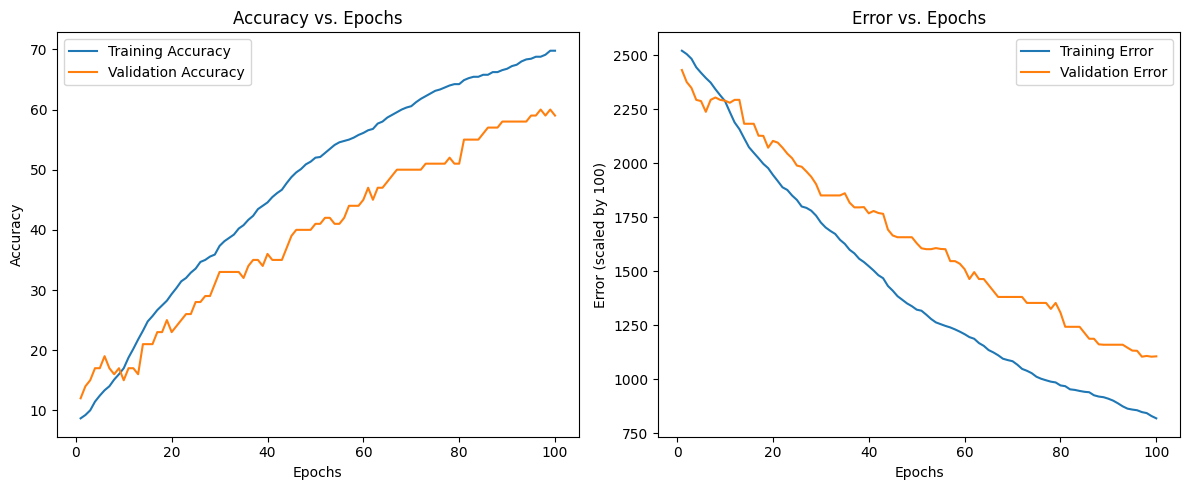



Training with dropout rate = 0.8 .....
Epoch:  0 Training Accuracy: 10.2222 Validation Accuracy: 9.0000 Training Error: 24.8065 Validation Error: 25.1442
Epoch:  10 Training Accuracy: 11.1111 Validation Accuracy: 8.0000 Training Error: 24.5609 Validation Error: 25.2325
Epoch:  20 Training Accuracy: 11.6667 Validation Accuracy: 8.0000 Training Error: 24.3318 Validation Error: 25.4205
Epoch:  30 Training Accuracy: 12.4444 Validation Accuracy: 9.0000 Training Error: 24.1803 Validation Error: 25.1447
Epoch:  40 Training Accuracy: 13.4444 Validation Accuracy: 9.0000 Training Error: 23.8569 Validation Error: 24.9314
Epoch:  50 Training Accuracy: 14.7778 Validation Accuracy: 11.0000 Training Error: 23.5481 Validation Error: 24.3982
Epoch:  60 Training Accuracy: 16.1111 Validation Accuracy: 13.0000 Training Error: 23.1580 Validation Error: 24.0415
Epoch:  70 Training Accuracy: 17.1111 Validation Accuracy: 16.0000 Training Error: 22.8583 Validation Error: 23.2109
Epoch:  80 Training Accuracy:

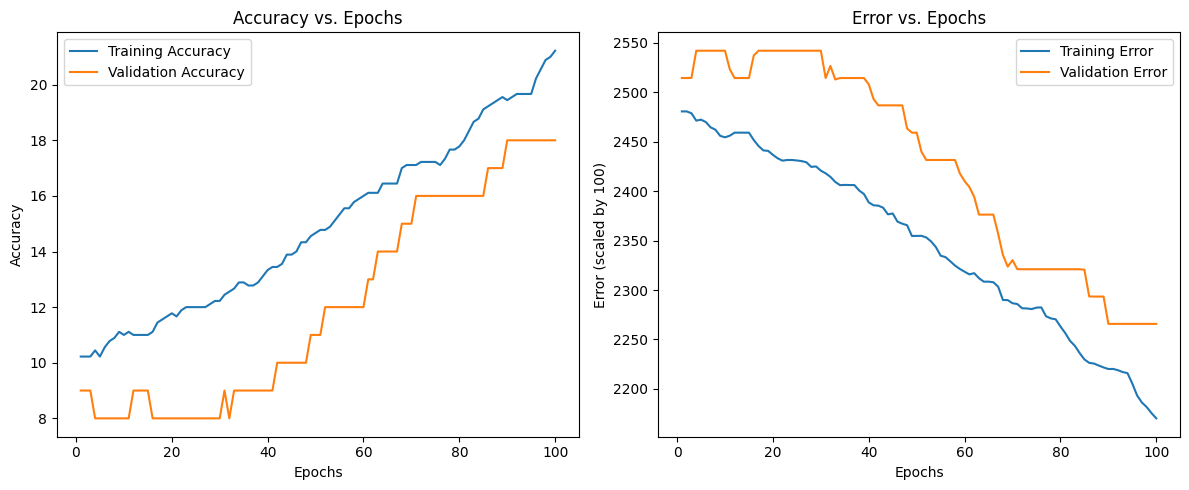

In [ ]:
##################################################
#Training with dropout strategy
##################################################

def apply_dropout(activations, dropout_rate):
    if dropout_rate > 0:  # Apply dropout only if dropout_rate is greater than 0
        mask = np.random.binomial(1, 1-dropout_rate, activations.shape)
        return activations * mask, mask
    return activations, None

def fwdPropagate(inputs, weights, biases, activation_function, dropout_rate, is_training):
    W1, W2, W3 = weights
    b1, b2, b3 = biases

    z1 = activation_function(np.dot(inputs, W1.T) + b1.T)
    if is_training and dropout_rate > 0:
        z1, mask1 = apply_dropout(z1, dropout_rate)
    else:
        mask1 = None

    z2 = activation_function(np.dot(z1, W2.T) + b2.T)
    if is_training and dropout_rate > 0:
        z2, mask2 = apply_dropout(z2, dropout_rate)
    else:
        mask2 = None

    y = softmax(np.dot(z2, W3.T) + b3.T)

    return [z1, z2, y], [mask1, mask2]



def computeGradients(X, t, weights, biases, activations, grad_activation_function, masks):
    W1, W2, W3 = weights
    b1, b2, b3 = biases
    z1, z2, y = activations
    mask1, mask2 = masks

    delta_3 = y - t
    dj_dw3 = np.dot(delta_3.T, z2) / X.shape[0]
    db3_grad = np.sum(delta_3, axis=0, keepdims=True).T / X.shape[0]

    delta_2 = np.dot(delta_3, W3) * grad_activation_function(z2)
    if mask2 is not None:
        delta_2 *= mask2  # Apply dropout mask
    dj_dw2 = np.dot(delta_2.T, z1) / X.shape[0]
    db2_grad = np.sum(delta_2, axis=0, keepdims=True).T / X.shape[0]

    delta_1 = np.dot(delta_2, W2) * grad_activation_function(z1)
    if mask1 is not None:
        delta_1 *= mask1  # Apply dropout mask
    dj_dw1 = np.dot(delta_1.T, X) / X.shape[0]
    db1_grad = np.sum(delta_1, axis=0, keepdims=True).T / X.shape[0]

    return [dj_dw1, dj_dw2, dj_dw3], [db1_grad, db2_grad, db3_grad]


def applyGradients(weights, biases, gradients, bias_grad, learning_rate):

  for i in range(len(weights)):
      weights[i] -= learning_rate * gradients[i]
      biases[i] -= learning_rate * bias_grad[i]

  return weights, biases

def backPropagate(X, t, weights, biases, activations, learning_rate, grad_activation_function, masks):

  gradients, bias_grad = computeGradients(X, t, weights, biases, activations, grad_activation_function, masks)

  weights, biases = applyGradients(weights, biases, gradients, bias_grad, learning_rate)

  return weights, biases

def computeCrossEntropyLoss(y_pred, y_true):
    epsilon = 1e-12
    y_pred = np.clip(y_pred, epsilon, 1. - epsilon)
    loss = -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]
    return loss

##################################################
#Train the network
##################################################

#Complete the below function to complete the training of network
def training(inputs, targets, plotting, batch_size, epochs, train_val_split, learning_rate,dropout_rate, activation_func, activation_func_grad):

  #Set the hyperparameters
  n_samples, input_features = inputs.shape
  n_classes = 10
  hidden_units = 512

  #Split the training data into two parts.
  #Use 90 percent of training data for training the network.
  #Remaining 10 percent as validation data
  split_index = int(n_samples * train_val_split)
  train_inputs, val_inputs = inputs[:split_index], inputs[split_index:]
  train_targets, val_targets = targets[:split_index], targets[split_index:]
  n_batches = int(np.ceil(train_inputs.shape[0]/batch_size))

  #Randomly initialize the weights
  W1 = np.random.randn(hidden_units, input_features)
  W2 = np.random.randn(hidden_units, hidden_units)
  W3 = np.random.randn(n_classes, hidden_units)

  b1 = np.zeros((hidden_units, 1))
  b2 = np.zeros((hidden_units, 1))
  b3 = np.zeros((n_classes, 1))

  weights = [W1, W2, W3]
  biases = [b1, b2, b3]

  # Store metrics
  train_acc_history = []
  val_acc_history = []
  train_err_history = []
  val_err_history = []

  #Interate for epochs times
  for epoch in range(epochs):

    #Shuffle the training data
    permut = np.random.permutation(train_inputs.shape[0])
    train_inputs_shuffled = train_inputs[permut]
    train_targets_shuffled = train_targets[permut]

    #Interate through the batches of data
    for batch in range(n_batches):

      #Get the batch of data
      batch_start = batch*batch_size
      batch_end = batch_start + batch_size

      X = train_inputs_shuffled[batch_start:batch_end]
      t = train_targets_shuffled[batch_start:batch_end]

      #Forward propagation
      activations, masks = fwdPropagate(X, weights,biases, activation_func, dropout_rate, is_training=True)

      #Backward propagation
      weights, biases = backPropagate(X, t, weights,biases, activations, learning_rate, activation_func_grad, masks)

    #Compute outpus on trianing data
    train_pred = fwdPropagate(train_inputs, weights, biases, activation_func, dropout_rate, is_training=False)[0][-1]

    #Compute training accuracy, and training error
    train_accuracy = np.mean(np.argmax(train_pred, axis=1) == np.argmax(train_targets, axis=1))    #indices of label which is 1 along column is matched, if same then correct prediction else wrong prediction
    train_err = computeCrossEntropyLoss(train_pred, train_targets)

    #Compute outputs on validation data
    val_pred= fwdPropagate(val_inputs, weights, biases,  activation_func, dropout_rate, is_training=False)[0][-1]

    #Compute validation accuracy, and validation error
    val_accuracy = np.mean(np.argmax(val_pred, axis=1) == np.argmax(val_targets, axis=1))
    val_err = computeCrossEntropyLoss(val_pred, val_targets)

    #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy
    if(epoch%10==0):
      print("Epoch: ", epoch, "Training Accuracy: {:.4f}".format(train_accuracy*100), "Validation Accuracy: {:.4f}".format(val_accuracy*100) , "Training Error: {:.4f}".format(train_err), "Validation Error: {:.4f}".format(val_err))

    #Save the parameters of network
    train_acc_history.append(train_accuracy*100)
    val_acc_history.append(val_accuracy*100)
    train_err_history.append(train_err*100)
    val_err_history.append(val_err*100)

  # Plotting
  if(plotting):
    epochs = len(train_acc_history)
    epochs_range = range(1, epochs + 1)
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_acc_history, label='Training Accuracy')
    plt.plot(epochs_range, val_acc_history, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_err_history, label='Training Error')
    plt.plot(epochs_range, val_err_history, label='Validation Error')
    plt.xlabel('Epochs')
    plt.ylabel('Error (scaled by 100)')
    plt.title('Error vs. Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()

  return weights, biases


#Call the training function to train the network
batch_size = 512
epochs = 100
train_val_split = 0.9
learning_rate = 0.0005

dropout_rates = [0, 0.2, 0.5, 0.8]
accuracies_and_err = {}

test_inputs = mnist_testdata
test_targets = mnist_testlabel_1ofk

for dropout_rate in dropout_rates:
  print(f'\n\nTraining with dropout rate = {dropout_rate} .....')
  weights, biases = training(mnist_traindata[:1000], mnist_trainlabel_1ofk[:1000],True,batch_size,epochs,train_val_split,learning_rate,dropout_rate, leaky_relu, grad_leaky_relu)

  #Testing data
  test_pred = fwdPropagate(test_inputs, weights, biases, leaky_relu, dropout_rate, is_training=False)[0][-1]
  test_accuracy = np.mean(np.argmax(test_pred, axis=1) == np.argmax(test_targets, axis=1))
  test_err = computeCrossEntropyLoss(test_pred, test_targets)
  accuracies_and_err[dropout_rate] = {'Accuracy': test_accuracy*100, 'Error': test_err}


In [ ]:

for dropout_rate in dropout_rates:
  acc = accuracies_and_err[dropout_rate]['Accuracy']
  err = accuracies_and_err[dropout_rate]['Error']
  print(f"Dropout rate: {dropout_rate}, Test Accuracy: {acc:.4f}%, Test Error: {err:.4f}")




Dropout rate: 0, Test Accuracy: 69.3900%, Test Error: 8.3731
Dropout rate: 0.2, Test Accuracy: 74.2700%, Test Error: 7.0617
Dropout rate: 0.5, Test Accuracy: 65.4100%, Test Error: 9.5057
Dropout rate: 0.8, Test Accuracy: 18.2500%, Test Error: 22.5324


### Observations:

1.  **Dropout Rate 0% (No Dropout)**
    
    *   **Test Accuracy:** 69.39%
    *   **Test Error:** 8.3731
    
    Without dropout, the accuracy is decent, but there might be overfitting since no regularization technique is applied to prevent the network from learning noise in the training data.
    
2.  **Dropout Rate 20%**
    
    *   **Test Accuracy:** 74.27%
    *   **Test Error:** 7.0617
    
    A dropout rate of 0.2 enhances the generalization of the network, leading to the highest test accuracy among the different dropout rates tested. This suggests that dropping out 20% of the activations during training helps the network to not rely too much on any individual node, thus promoting more robust features that generalize better.
    
3.  **Dropout Rate 50%**
    
    *   **Test Accuracy:** 65.41%
    *   **Test Error:** 9.5057
    
    Increasing the dropout rate to 0.5 decreases the accuracy and increases the error compared to a rate of 0.2. This could be because a higher rate of dropout might be too aggressive, causing the network to lose some of the relevant features needed for making accurate predictions.
    
4.  **Dropout Rate 80%**
    
    *   **Test Accuracy:** 18.25%
    *   **Test Error:** 22.5324
    
    A dropout rate of 0.8 drastically reduces the network's accuracy. Such a high dropout rate likely disrupts the training process too much, preventing the network from learning effectively.

## Early Stopping Implementaion

Training without regularization... 
Epoch:  0 Training Accuracy: 58.7429 Validation Accuracy: 56.6667 Training Error: 11.2693 Validation Error: 11.9191
Epoch:  10 Training Accuracy: 88.4857 Validation Accuracy: 81.2667 Training Error: 3.0995 Validation Error: 5.0944
Epoch:  20 Training Accuracy: 94.2286 Validation Accuracy: 82.6667 Training Error: 1.5212 Validation Error: 4.7273
Epoch:  30 Training Accuracy: 93.8571 Validation Accuracy: 82.2667 Training Error: 1.6433 Validation Error: 4.8364
Epoch:  40 Training Accuracy: 96.2000 Validation Accuracy: 82.1333 Training Error: 0.9692 Validation Error: 4.8740
Epoch:  50 Training Accuracy: 98.5429 Validation Accuracy: 82.8667 Training Error: 0.3732 Validation Error: 4.6911
Epoch:  60 Training Accuracy: 99.5143 Validation Accuracy: 82.8000 Training Error: 0.1011 Validation Error: 4.6735
Epoch:  70 Training Accuracy: 99.8571 Validation Accuracy: 82.8667 Training Error: 0.0264 Validation Error: 4.6752
Epoch:  80 Training Accuracy: 100.0000 Vali

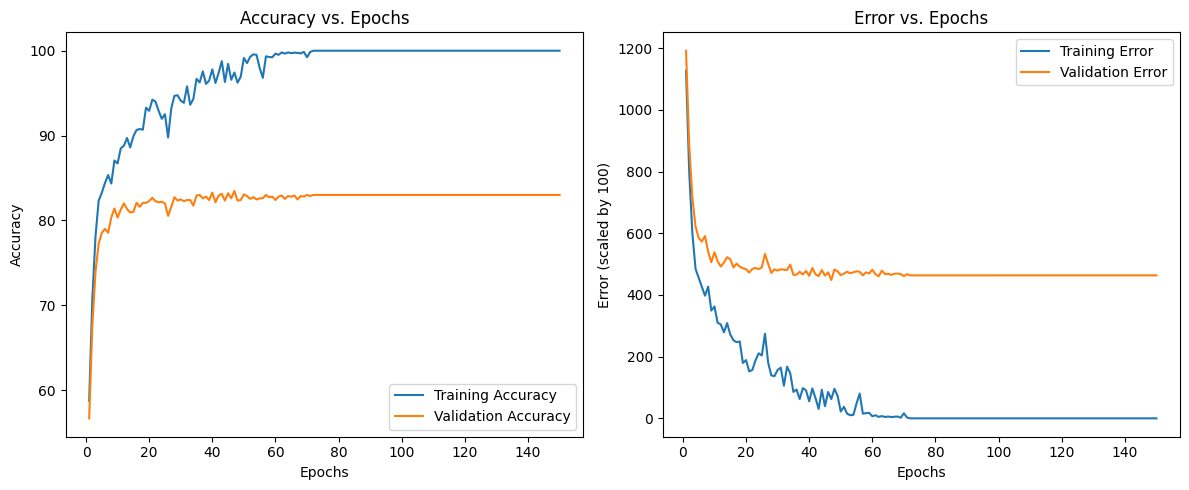

In [ ]:
##################################
# Training with Early stopping   #
##################################

def fwdPropagate(inputs, weights, biases, activations_function):
  W1, W2, W3 = weights
  b1, b2, b3 = biases
  z1 = activations_function(np.dot(inputs, W1.T) + b1.T)
  z2 = activations_function(np.dot(z1, W2.T) + b2.T)
  y = softmax(np.dot(z2, W3.T) + b3.T)
  return [z1, z2, y]


def computeGradients(X, t, weights, biases, activations,grad_activation_function):
  W1, W2, W3 = weights
  b1, b2, b3 = biases
  z1, z2, y = activations

  delta_3 = y - t
  dj_dw3 = np.dot(delta_3.T, z2) / X.shape[0]
  db3_grad = np.sum(delta_3, axis=0, keepdims=True).T / X.shape[0]

  delta_2 = np.dot(delta_3, W3) * grad_activation_function(z2)
  dj_dw2 = np.dot(delta_2.T, z1) / X.shape[0]
  db2_grad = np.sum(delta_2, axis=0, keepdims=True).T / X.shape[0]

  delta_1 = np.dot(delta_2, W2) * grad_activation_function(z1)
  dj_dw1 = np.dot(delta_1.T, X) / X.shape[0]
  db1_grad = np.sum(delta_1, axis=0, keepdims=True).T / X.shape[0]

  return [dj_dw1, dj_dw2, dj_dw3], [db1_grad, db2_grad, db3_grad]

def applyGradients(weights, biases, gradients, bias_grad, learning_rate):
  for i in range(len(weights)):
      weights[i] -= learning_rate * gradients[i]
      biases[i] -= learning_rate * bias_grad[i]
  return weights, biases

def backPropagate(X, t, weights, biases, activations, learning_rate, grad_activation_function):
  gradients, bias_grad = computeGradients(X, t, weights, biases, activations, grad_activation_function)
  weights, biases = applyGradients(weights, biases, gradients, bias_grad, learning_rate)
  return weights, biases

def computeCrossEntropyLoss(y_pred, y_true , weights):
    epsilon = 1e-12
    y_pred = np.clip(y_pred, epsilon, 1. - epsilon)
    loss = -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]
    return loss

##################################################
#Train the network
##################################################

#Complete the below function to complete the training of network
def training(inputs, targets, plotting, batch_size, epochs, train_val_split, learning_rate, activation_func, activation_func_grad, patience, min_delta):

  #Set the hyperparameters
  n_samples, input_features = inputs.shape
  n_classes = 10
  hidden_units = 512

  #Split the training data into two parts.
  #Use 90 percent of training data for training the network.
  #Remaining 10 percent as validation data
  split_index = int(n_samples * train_val_split)
  train_inputs, val_inputs = inputs[:split_index], inputs[split_index:]
  train_targets, val_targets = targets[:split_index], targets[split_index:]
  n_batches = int(np.ceil(train_inputs.shape[0]/batch_size))

  #Randomly initialize the weights
  W1 = np.random.randn(hidden_units, input_features)
  W2 = np.random.randn(hidden_units, hidden_units)
  W3 = np.random.randn(n_classes, hidden_units)

  b1 = np.zeros((hidden_units, 1))
  b2 = np.zeros((hidden_units, 1))
  b3 = np.zeros((n_classes, 1))

  weights = [W1, W2, W3]
  biases = [b1, b2, b3]

  # Store metrics
  train_acc_history = []
  val_acc_history = []
  train_err_history = []
  val_err_history = []

  best_val_err = np.inf
  best_epoch = 0
  early_stop_counter = 0

  #Interate for epochs times
  for epoch in range(epochs):

    #Shuffle the training data
    permut = np.random.permutation(train_inputs.shape[0])
    train_inputs_shuffled = train_inputs[permut]
    train_targets_shuffled = train_targets[permut]

    #Interate through the batches of data
    for batch in range(n_batches):

      #Get the batch of data
      batch_start = batch*batch_size
      batch_end = batch_start + batch_size

      X = train_inputs_shuffled[batch_start:batch_end]
      t = train_targets_shuffled[batch_start:batch_end]

      #Forward propagation
      activations = fwdPropagate(X, weights,biases, activation_func)

      #Backward propagation
      weights, biases = backPropagate(X, t, weights,biases, activations, learning_rate, activation_func_grad)

    #Compute outpus on trianing data
    train_pred = fwdPropagate(train_inputs, weights, biases, activation_func)[-1]

    #Compute training accuracy, and training error
    train_accuracy = np.mean(np.argmax(train_pred, axis=1) == np.argmax(train_targets, axis=1))    #indices of label which is 1 along column is matched, if same then correct prediction else wrong prediction
    train_err = computeCrossEntropyLoss(train_pred, train_targets, weights)

    #Compute outputs on validation data
    val_pred = fwdPropagate(val_inputs, weights, biases,  activation_func)[-1]

    #Compute validation accuracy, and validation error
    val_accuracy = np.mean(np.argmax(val_pred, axis=1) == np.argmax(val_targets, axis=1))
    val_err = computeCrossEntropyLoss(val_pred, val_targets, weights)


    #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy
    if(epoch%10==0):
      print("Epoch: ", epoch, "Training Accuracy: {:.4f}".format(train_accuracy*100), "Validation Accuracy: {:.4f}".format(val_accuracy*100) , "Training Error: {:.4f}".format(train_err), "Validation Error: {:.4f}".format(val_err))

    #Save the parameters of network
    train_acc_history.append(train_accuracy*100)
    val_acc_history.append(val_accuracy*100)
    train_err_history.append(train_err*100)
    val_err_history.append(val_err*100)

    #Early stopping criterion
    if val_err < best_val_err - min_delta:
      best_val_err = val_err
      best_epoch=epoch
      early_stop_counter = 0
    else :
      early_stop_counter +=1
      if(early_stop_counter >= patience):
        print(f"Stopping early at epoch {epoch} due to no improvement in validation error.")
        break

  # Plotting
  if(plotting):
    epochs = len(train_acc_history)
    epochs_range = range(1, epochs + 1)
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_acc_history, label='Training Accuracy')
    plt.plot(epochs_range, val_acc_history, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_err_history, label='Training Error')
    plt.plot(epochs_range, val_err_history, label='Validation Error')
    plt.xlabel('Epochs')
    plt.ylabel('Error (scaled by 100)')
    plt.title('Error vs. Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()

  return weights, biases , epoch


#Call the training function to train the network
batch_size = 128
epochs = 150
train_val_split = 0.7
learning_rate = 0.001


print("Training without regularization... ")
patience = epochs  #Keeping patience = epochs means early stopping will never occur
min_delta = 0.01
weights, biases, epochs_trained = training(mnist_traindata[:5000], mnist_trainlabel_1ofk[:5000],True,batch_size,epochs,train_val_split,learning_rate, leaky_relu, grad_leaky_relu,patience, min_delta )

#Testing data
test_inputs = mnist_testdata
test_targets = mnist_testlabel_1ofk
test_pred = fwdPropagate(test_inputs, weights, biases, leaky_relu)[-1]
test_accuracy_without_reg = np.mean(np.argmax(test_pred, axis=1) == np.argmax(test_targets, axis=1))
test_err_without_reg = computeCrossEntropyLoss(test_pred, test_targets, weights)





Training with early stopping... 
Epoch:  0 Training Accuracy: 57.0286 Validation Accuracy: 55.3333 Training Error: 11.8107 Validation Error: 12.2752
Epoch:  10 Training Accuracy: 88.1143 Validation Accuracy: 83.3333 Training Error: 3.2266 Validation Error: 4.5782
Epoch:  20 Training Accuracy: 92.0000 Validation Accuracy: 83.6667 Training Error: 2.1133 Validation Error: 4.4673
Epoch:  30 Training Accuracy: 94.5429 Validation Accuracy: 83.8000 Training Error: 1.4063 Validation Error: 4.3765
Epoch:  40 Training Accuracy: 94.8286 Validation Accuracy: 84.0667 Training Error: 1.3268 Validation Error: 4.3414
Stopping early at epoch 42 due to no improvement in validation error.


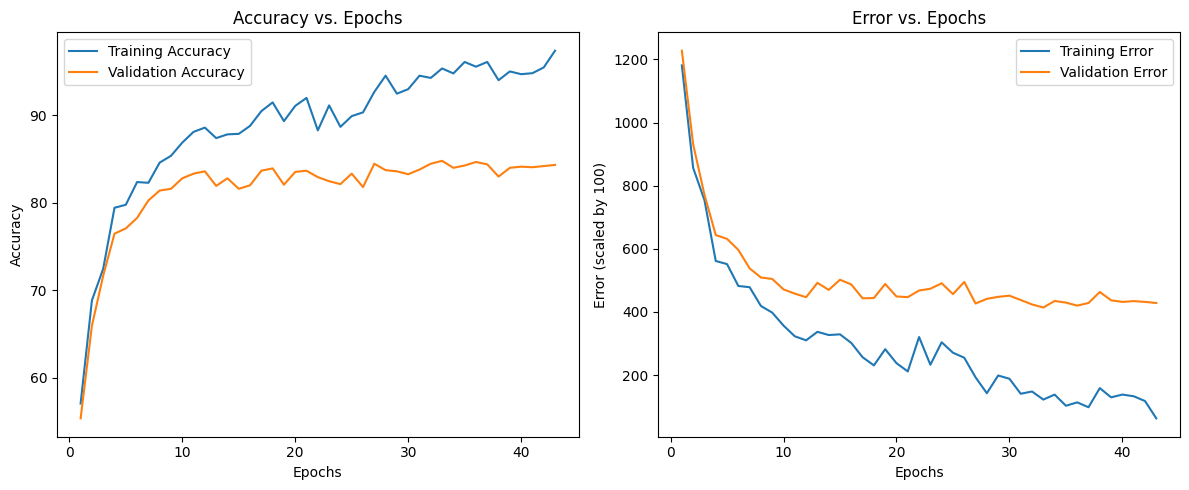

In [ ]:
print("\n\nTraining with early stopping... ")
patience = 10
min_delta = 0.01
weights, biases, epochs_trained = training(mnist_traindata[:5000], mnist_trainlabel_1ofk[:5000],True,batch_size,epochs,train_val_split,learning_rate, leaky_relu, grad_leaky_relu,patience, min_delta )

#Testing data
test_inputs = mnist_testdata
test_targets = mnist_testlabel_1ofk
test_pred = fwdPropagate(test_inputs, weights, biases, leaky_relu)[-1]
test_accuracy= np.mean(np.argmax(test_pred, axis=1) == np.argmax(test_targets, axis=1))
test_err = computeCrossEntropyLoss(test_pred, test_targets, weights)

In [ ]:
print("Without Regularization: Test Accuracy: {:.4f}".format(test_accuracy_without_reg*100), "Test Error: {:.4f}".format(test_err_without_reg), "Number of Epochs: 150")
print("With Early Stopping : Test Accuracy: {:.4f}".format(test_accuracy*100), "Test Error: {:.4f}".format(test_err), "Number of Epochs: ", epochs_trained)

Without Regularization: Test Accuracy: 84.5900 Test Error: 4.1971 Number of Epochs: 150
With Early Stopping : Test Accuracy: 84.6300 Test Error: 4.1950 Number of Epochs:  42


### Observations:

*   **Without Regularization**
    
    *   **Test Accuracy:** 84.59%
    *   **Test Error:** 4.1971
    *   **Number of Epochs:** 150
*   **With Early Stopping**
    
    *   **Test Accuracy:** 84.63%
    *   **Test Error:** 4.1950
    *   **Number of Epochs:** 42

Here, the accuracy with early stopping is marginally higher than the accuracy without regularization, and the test error is slightly lower, despite the significant reduction in the number of epochs.

### Reasoning:

*   **Optimal Stopping Point**: It appears that early stopping has correctly identified a point in the training process where further training does not yield significant improvements in generalization to test data. This suggests that the criteria used for early stopping this time were well-tuned.
    
*   **Efficiency Gain**: By stopping at 42 epochs instead of continuing to 150, there is a significant reduction in computational resources and time spent training without sacrificing model performance. This makes early stopping a highly efficient approach in this context.



# <b> Part - (5)
<b> Part - (5) : Comparision with linear classifiers: </b> In this part of the assignment, you will compare the performance of deep neural network based classification models with the linear classification models. You will be provided with codes to generate two types of binary classification data. First type of data is linearly separabble. The second type of data is not linearly separable. You have to classify these two types of data bases using both deep neural network models and linear classification models.

<dt> <h6> 1. Linearly separable data: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 3  \\ 3  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 4500 samples per class for training and 500 samples for testing.
</dt> </h6>
<dt> <h6> 2. Non-linearly separable data: Given code generates binary classification data that is not linearly separable. Each class has around 5000 data points. Class1 data is denoted with the variable "class1_data". Class2 data is denoted with the variable "class2_data". Use 90% of data for training and 10 % for testing.    </dt> </h6>

<dt> <h6> <b> Programming questions: </b> </dt> </h6>

<dt> <h6> 3. Linear classification models - logistic regression ( Iterative reweighted least squares approach ): logistic regression model: $y = \frac{1}{1+e^{-\textbf{w}^{T}\textbf{x}}}$. Given the training data, X_train and Y_train, your task is to identify the optimal $\textbf{w}$ that accurately predicts y based on the input $\textbf{x}$. Subsequently, this $\textbf{w}$ can be applied to predict outcomes on the test data X_test. </dt> </h6>
<dd> <h6> a). Create a function called "Logistic_Regression" that accepts training data, training labels, and testing data as inputs. The function should aim to discover the optimal $\textbf{w}$ using the training data. You can initialize $\textbf{w}$ with random values and iteratively update it to determine the optimal $\textbf{w}$. Subsequently, this optimal $\textbf{w}$ can be employed to make predictions on the test data.
</dd> </h6>
<dd> <h6> b). Evaluate the classification performance, i.e., compute the accuracy on the test data. </dd> </h6>
<dd> <h6> c). Write a function to generate & visualize the decision regions, either by showing the boundary line or by using different. </dd> </h6>

<dt> <h6> 4. Deep neural network based classification models: Let us cosider feed-forward neural network with three layers. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dt> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dt> </h6>

<dd> <h6> - where $\textbf{W}_{1} \in \mathcal{R}^{3 \times 2}$,$\textbf{W}_{2} \in \mathcal{R}^{3 \times 3}$,$\textbf{W}_{3} \in \mathcal{R}^{1 \times 3} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dt> </h6>

<dd> <h6> - Consider g(.) as ReLU activation function. Sigmoid activation function should be used at the last layer h(.), to get the posterior probability of the class1. Class2 posterior probability can obtained by (1 - class1 posterior probability). </dt> </h6>
<dd> <h6> - Train the binary classification network using the given training data. Plot second layer activation potentials, i.e., feed-forward the entire data to obtain the 3 dimensional activation potentials at second layer. Plot them and observe how they distribute in the 3-dimensional space compared to the original 2-dimensional space. </dt> </h6>
<dd> <h6> - Evaluate the classification performance on test data. Report your observations </dt> </h6>

<dt> <h6> 3. Compare linear classification models with the deep neural network based classification models. Report your observations. </dt> </h6>



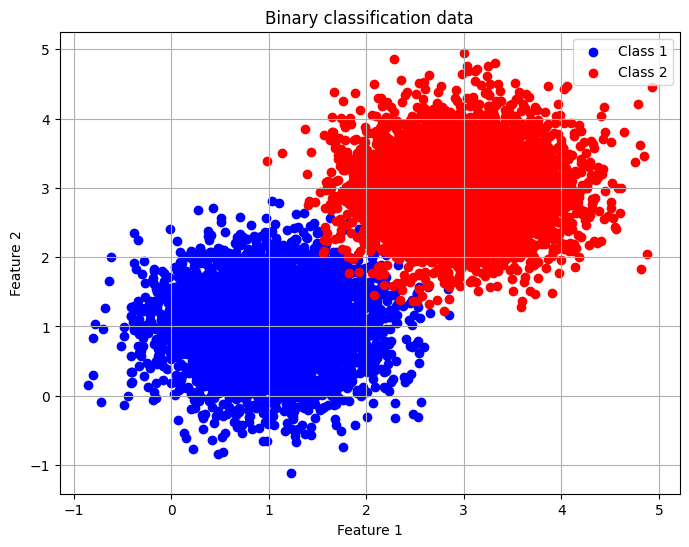

In [ ]:
##################################################
#Generating binary classification data (linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

mean1 = [1,1]
mean2 = [3,3]
cov = [[0.3,0],[0,0.3]]
class1_tr = np.random.multivariate_normal(mean1, cov, size=(4500))
class2_tr = np.random.multivariate_normal(mean2, cov, size=(4500))

tr_data = np.concatenate([class1_tr, class2_tr], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_tr)), np.ones(len(class2_tr))])

class1_te = np.random.multivariate_normal(mean1, cov, size=(500))
class2_te = np.random.multivariate_normal(mean2, cov, size=(500))

te_data = np.concatenate([class1_te, class2_te], axis=0)
te_targets = np.concatenate([np.zeros(len(class1_te)), np.ones(len(class2_te))])

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_tr[:, 0], class1_tr[:, 1], color='blue', label='Class 1')
plt.scatter(class2_tr[:, 0], class2_tr[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()


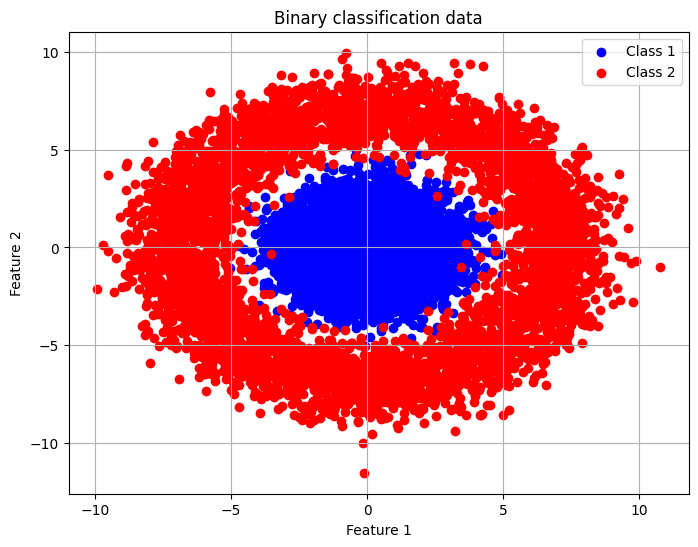

In [ ]:
##################################################
#Generating binary classification data (non-linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

# Function to generate data for concentric circles
def generate_concentric_data(n_samples, radius1,radius2, noise_std):
    # Generate random angles
    angles = np.random.rand(n_samples) * 2 * np.pi
    noise = noise_std*np.random.randn(n_samples)
    # Generate inner and outer circles
    inner_circle = np.array([(radius1 + noise) * np.cos(angles), (radius1 + noise) * np.sin(angles)]).T
    outer_circle = np.array([(radius2 + noise) * np.cos(angles), (radius2 + noise) * np.sin(angles)]).T
    return inner_circle, outer_circle

# Generate data for two classes
n_samples = 5000  # Number of samples for each class
radius1 = 2  # Radius of inner circle
radius2 = 7  # Radius of inner circle
noise_std = 1   # Noise to be added to radius

class1_data, class2_data = generate_concentric_data(n_samples, radius1,radius2,noise_std)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='blue', label='Class 1')
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()

# Generate labels for the data
n_tr = 4500
n_te = 500

tr_data = np.concatenate([class1_data[:n_tr, :], class2_data[:n_tr, :]], axis=0)
tr_targets = np.concatenate([np.zeros(n_tr), np.ones(n_tr)])
tr_targets = tr_targets.reshape((9000,1))

te_data = np.concatenate([class1_data[n_tr:, :], class2_data[n_tr:, :]], axis=0)
te_targets = np.concatenate([np.zeros(n_te), np.ones(n_te)])
te_targets = tr_targets.reshape((9000,1))


### Feed Forward Neural Network for binary classification

In [ ]:
#################################################
# Feed Forward Neural Network for binary classification
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def ReLu(inp):
  return np.maximum(0, inp)

def gradReLu(inp):
  return np.where(inp > 0, 1, 0)

def sigmoid(inp):
  return 1 / (1 + np.exp(-inp))

def fwdPropagate(inputs, weights, biases, activations_function):
  #Inputs: input data, paramters of network
  W1, W2, W3 = weights # W1 shape: (3, 2), W2 shape: (3, 3), W3 shape: (1, 3)
  b1, b2, b3 = biases  # b1 shape: (3, 1), b2 shape: (3, 1), b3 shape: (1, 1)

  # inputs shape: [batch_size, 2]

  #Structure
  #Input Layer ----(W1)----> Hidden Layer1 ----(W2)----> Hidden Layer2 ----(W3)----> Output Layer
  #   2                       3                         3                          1

  #Forward propogation
  z1 = activations_function(np.dot(inputs, W1.T) + b1.T)  # Shape: [batch_size, 3]
  z2 = activations_function(np.dot(z1, W2.T) + b2.T)      # Shape: [batch_size, 3]
  y = sigmoid(np.dot(z2, W3.T) + b3.T)    # Shape: [batch_size, 1]

  #Return the requires outputs, i.e., final output and intermediate activations
  return [z1, z2, y]


#Complete the below function to compute the gradients
def computeGradients(X, t, weights, biases, activations,grad_activation_function):
  #Inputs: input data, targets, parameters of netwrok, intermediate activations
  W1, W2, W3 = weights  # W1 shape: (3, 2), W2 shape: (3, 3), W3 shape: (1, 3)
  b1, b2, b3 = biases   # b1 shape: (3,1), b2 shape: (3,1), b3 shape: (1,1)
  z1, z2, y = activations # z1 shape: [batch_size, 3], z2 shape: [batch_size, 3], y shape: [batch_size, 1]

  #Compute the loss

  #Compote the derivative of loss at parameters
  # Output layer gradients
  delta_3 = y - t  # Shape: [batch_size, 1]
  dj_dw3 = np.dot(delta_3.T, z2) / X.shape[0]  # Shape: [1, 3]
  db3_grad = np.sum(delta_3, axis=0, keepdims=True).T / X.shape[0]  # Shape: [1, 1]

  # Hidden layer 2 gradients
  delta_2 = np.dot(delta_3, W3) * grad_activation_function(z2)  # Shape: [batch_size, 3]
  dj_dw2 = np.dot(delta_2.T, z1) / X.shape[0]   # Shape: [3, 3]
  db2_grad = np.sum(delta_2, axis=0, keepdims=True).T / X.shape[0]  # Shape: [3, 1]

  # Hidden layer 1 gradients
  delta_1 = np.dot(delta_2, W2) * grad_activation_function(z1)  # Shape: [batch_size, 3]
  dj_dw1 = np.dot(delta_1.T, X) / X.shape[0]    # Shape: [3, 2]
  db1_grad = np.sum(delta_1, axis=0, keepdims=True).T / X.shape[0]  # Shape: [3, 1]

  #Return the gradients
  return [dj_dw1, dj_dw2, dj_dw3], [db1_grad, db2_grad, db3_grad]

def initializeAdamParams(weights, biases):
    v = [np.zeros_like(w) for w in weights]
    s = [np.zeros_like(w) for w in weights]
    v_bias = [np.zeros_like(b) for b in biases]
    s_bias = [np.zeros_like(b) for b in biases]
    return v, s, v_bias, s_bias


def applyAdam(weights, biases, gradients, bias_gradients, learning_rate, v, s, v_bias, s_bias, t, beta1=0.9, beta2=0.999, epsilon=1e-8):
    # Update weights
    for i in range(len(weights)):
        v[i] = beta1 * v[i] + (1 - beta1) * gradients[i]
        s[i] = beta2 * s[i] + (1 - beta2) * (gradients[i] ** 2)

        v_corrected = v[i] / (1 - beta1 ** t)
        s_corrected = s[i] / (1 - beta2 ** t)

        weights[i] -= learning_rate * v_corrected / (np.sqrt(s_corrected) + epsilon)

    # Update biases
    for i in range(len(biases)):
        v_bias[i] = beta1 * v_bias[i] + (1 - beta1) * bias_gradients[i]
        s_bias[i] = beta2 * s_bias[i] + (1 - beta2) * (bias_gradients[i] ** 2)

        v_bias_corrected = v_bias[i] / (1 - beta1 ** t)
        s_bias_corrected = s_bias[i] / (1 - beta2 ** t)

        biases[i] -= learning_rate * v_bias_corrected / (np.sqrt(s_bias_corrected) + epsilon)

    return weights, biases, v, s, v_bias, s_bias

def computeBinaryCrossEntropyLoss(y_pred, y_true):
    epsilon = 1e-12
    y_pred = np.clip(y_pred, epsilon, 1. - epsilon)
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

##################################################
#Train the network
##################################################

#Complete the below function to complete the training of network
def training(inputs, targets, plotting, batch_size, epochs, train_val_split, learning_rate, activation_func, activation_func_grad, patience, min_delta):

  #Set the hyperparameters
  n_samples, input_features = inputs.shape
  n_classes = 2
  output_neuron = 1
  hidden_units = 3

  #Split the training data into two parts.
  #Use 90 percent of training data for training the network.
  #Remaining 10 percent as validation data

  #shuffle data
  permut = np.random.permutation(n_samples)
  inputs= inputs[permut]
  targets = targets[permut]

  split_index = int(n_samples * train_val_split)
  train_inputs, val_inputs = inputs[:split_index], inputs[split_index:]
  train_targets, val_targets = targets[:split_index], targets[split_index:]
  n_batches = int(np.ceil(train_inputs.shape[0]/batch_size))

  #Randomly initialize the weights
  W1 = np.random.randn(hidden_units, input_features) * np.sqrt(2. / ((input_features + hidden_units)))
  W2 = np.random.randn(hidden_units, hidden_units) * np.sqrt(2. / (hidden_units  + hidden_units) )
  W3 = np.random.randn(output_neuron, hidden_units) * np.sqrt(2. / (hidden_units+1))

  b1 = np.random.randn(hidden_units, 1)
  b2 = np.random.randn(hidden_units, 1)
  b3 = np.random.randn(output_neuron, 1)

  weights = [W1, W2, W3]
  biases = [b1, b2, b3]

  best_val_err = np.inf
  early_stop_counter = 0

  v, s, v_bias, s_bias = initializeAdamParams(weights, biases)
  time = 0

  # Store metrics
  train_acc_history = []
  val_acc_history = []
  train_err_history = []
  val_err_history = []

  #Interate for epochs times
  for epoch in range(epochs):

    #Shuffle the training data
    permut = np.random.permutation(train_inputs.shape[0])
    train_inputs_shuffled = train_inputs[permut]
    train_targets_shuffled = train_targets[permut]

    #Interate through the batches of data
    for batch in range(n_batches):

      #Get the batch of data
      batch_start = batch*batch_size
      batch_end = batch_start + batch_size

      X = train_inputs_shuffled[batch_start:batch_end]
      t = train_targets_shuffled[batch_start:batch_end]

      #Forward propagation
      activations = fwdPropagate(X, weights,biases, activation_func)

      # Update time step for Adam
      time += 1

      # Backward propagation with Adam instead of simple gradient update
      gradients, bias_grad = computeGradients(X, t, weights, biases, activations, activation_func_grad)
      weights, biases, v, s, v_bias, s_bias = applyAdam(weights, biases, gradients, bias_grad, learning_rate, v, s, v_bias, s_bias, time)

    #Compute outpus on trianing data
    train_pred = fwdPropagate(train_inputs, weights, biases, activation_func)[-1]
    train_err = computeBinaryCrossEntropyLoss(train_pred, train_targets)

    #Compute training accuracy, and training error
    train_pred = np.where(train_pred > 0.5, 1, 0)
    train_accuracy = np.mean(train_pred == train_targets)    #indices of label which is 1 along column is matched, if same then correct prediction else wrong prediction

    #Compute outputs on validation data
    val_pred = fwdPropagate(val_inputs, weights, biases,  activation_func)[-1]
    val_err = computeBinaryCrossEntropyLoss(val_pred, val_targets)

    #Compute validation accuracy, and validation error
    val_pred = np.where(val_pred > 0.5, 1, 0)
    val_accuracy = np.mean(val_pred == val_targets)

    #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy
    if(epoch%5==0):
      print("Epoch: ", epoch, "Training Accuracy: {:.4f}".format(train_accuracy*100), "Validation Accuracy: {:.4f}".format(val_accuracy*100) , "Training Error: {:.4f}".format(train_err), "Validation Error: {:.4f}".format(val_err))

    #Save the parameters of network
    train_acc_history.append(train_accuracy*100)
    val_acc_history.append(val_accuracy*100)
    train_err_history.append(train_err*100)
    val_err_history.append(val_err*100)

    #Early stopping criterion
    if val_err < best_val_err - min_delta:
      best_val_err = val_err
      best_epoch=epoch
      early_stop_counter = 0
    else :
      early_stop_counter +=1
      if(early_stop_counter >= patience):
        print(f"Stopping early at epoch {epoch} due to no improvement in validation error.")
        break


  # Plotting
  if(plotting):
    epochs = len(train_acc_history)
    epochs_range = range(1, epochs + 1)
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_acc_history, label='Training Accuracy')
    plt.plot(epochs_range, val_acc_history, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_err_history, label='Training Error')
    plt.plot(epochs_range, val_err_history, label='Validation Error')
    plt.xlabel('Epochs')
    plt.ylabel('Error (scaled by 100)')
    plt.title('Error vs. Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()

  second_layer_activations = fwdPropagate(inputs, weights, biases, activation_func)[1]
  fig = plt.figure(figsize=(14, 8))
  ax = fig.add_subplot(111, projection='3d')

  class1_mask = (targets.flatten() == 0)
  class2_mask = (targets.flatten() == 1)

  # Plot class 1 points
  ax.scatter(
      second_layer_activations[class1_mask, 0],
      second_layer_activations[class1_mask, 1],
      second_layer_activations[class1_mask, 2],
      c='red', label='Class 1')

  # Plot class 2 points
  ax.scatter(
      second_layer_activations[class2_mask, 0],
      second_layer_activations[class2_mask, 1],
      second_layer_activations[class2_mask, 2],
      c='blue', label='Class 2')

  ax.set_xlabel('Activation 1')
  ax.set_ylabel('Activation 2')
  ax.set_zlabel('Activation 3')

  ax.set_title('Second Layer Activation Potentials in 3D Space')
  ax.legend()

  # ax.view_init(elev=75, azim=60)

  # Show plot
  plt.show()


  return weights, biases


### Logistic regression for binary classification

In [ ]:
#####################################
# Logistic regression for binary classification
####################################

#All imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math

def sigmoid(x):
  x = np.clip(x, -500, 500)  # Clip values to avoid overflow
  return 1/(1+np.exp(-x))

def Logistic_Regression(X_train, Y_train, X_test):
  #Inputs: Training data, Training labels, and Testing data
  #Outputs: Predictions on test data

  max_iter =  1000 #max number of ierations for parameter update
  threshold = 0.5  #threshold for classification
  tol = 0.0001 #tolerance for convergence
  X = np.hstack((np.ones((X_train.shape[0], 1)), X_train))         #Data. Append ones to the training data to take care of the bias
  w = np.random.randn(X.shape[1])        #Initialize the weight vector
  t = Y_train  #Training targets
  lambda_reg=1e-2 #Adding a regularization to prevent singular matrix
  for iter in range(0,max_iter,1):
    y = sigmoid(X@w)   #Predictions on X. Sigmoid(w^T.x)
    error = y - t      #Difference between preds and Y_train
    #Compute the gradients and the appropriate learning rate. We can use Hessian matrix as learning rate
    Grad = X.T@(y-t)  #Gradient of the loss function
    R = np.diag(y*(1-y))  # R diagonal matrix with Rnn = yn*(1-yn)
    H = X.T@R@X + lambda_reg*np.identity(X.shape[1])  #Hessian matrix with regularization
    # z = (X@w) - np.linalg.inv(R)@(y-t)

    #Update the weight vector (Using IWLS - Iterative Weighted Least Squares)
    w = w - (np.linalg.inv(H)@Grad)
    # w = np.linalg.inv((X.T)@R@X) @ (X.T@R@z)

  #Test data predictions
  #Append ones to testing data
  X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
  test_preds = sigmoid(X_test@w)

  #Compare the predictions with 0, to output the decision
  test_preds = [1 if i >= threshold else 0 for i in test_preds]

  #Return the predicted test labels
  return np.array(test_preds),w

def LR_Accuracy(Y_test, Y_pred):
  #Inputs: Ground truth and predicted lables of test data
  #Outputs: Accuracy
  acc = np.mean(Y_pred == te_targets)*100
  #Compute and return the accuracy
  return acc

def plot_decision_boundary_logistic(tr_data, tr_targets, te_data,te_targets, w):

    #adding the bias term
    tr_data = np.hstack((np.ones((tr_data.shape[0], 1)), tr_data))
    te_data = np.hstack((np.ones((te_data.shape[0], 1)), te_data))

    # Plot the dataset
    fig, axs = plt.subplots(1, 2, figsize=(13, 5.5))
    axs[0].scatter(tr_data[:, 1], tr_data[:, 2], c=tr_targets, alpha=0.6, cmap=ListedColormap(['red', 'blue']))
    axs[1].scatter(te_data[:, 1], te_data[:, 2], c=te_targets, alpha=0.6, cmap=ListedColormap(['red', 'blue']))

    #Plot the decision boundary
    x_values = np.linspace(tr_data[:, 1].min()-1, tr_data[:, 1].max()+1, 2)
    y_values = -(w[1] / w[2]) * x_values - (w[0] / w[2])
    axs[0].plot(x_values, y_values, 'k--', label='Decision Boundary')

    X_values = np.linspace(te_data[:, 1].min()-1, te_data[:, 1].max()+1, 2)
    Y_values = -(w[1] / w[2]) * X_values - (w[0] / w[2])
    axs[1].plot(X_values, Y_values, 'k--', label='Decision Boundary')

    tr_pred = [1 if i >= 0.5 else 0 for i in (sigmoid(tr_data@w))]
    te_pred = [1 if i >= 0.5 else 0 for i in (sigmoid(te_data@w))]

    axs[0].set_title(f'Logistic Regression Decision Boundary - Training Data (Train Acc = {np.mean(tr_targets == tr_pred)*100})')
    axs[0].set_xlabel('x1')
    axs[0].set_ylabel('x2')
    axs[0].set_xlim((tr_data[:, 1].min()-1,tr_data[:, 1].max()+1))
    axs[0].set_ylim((te_data[:, 1].min()-1, te_data[:, 1].max()+1))
    axs[0].legend()

    axs[1].set_title(f'Logistic Regression Decision Boundary - Testing Data (Test Acc = {np.mean(te_targets == te_pred)*100})')
    axs[1].set_xlabel('x1')
    axs[1].set_ylabel('x2')
    axs[1].set_xlim((tr_data[:, 1].min()-1,tr_data[:, 1].max()+1))
    axs[1].set_ylim((te_data[:, 1].min()-1, te_data[:, 1].max()+1))
    axs[1].legend()

    plt.tight_layout()
    plt.show()



### Classification on linearly separable data

Accuracy with Logistic Regression: 99.7 



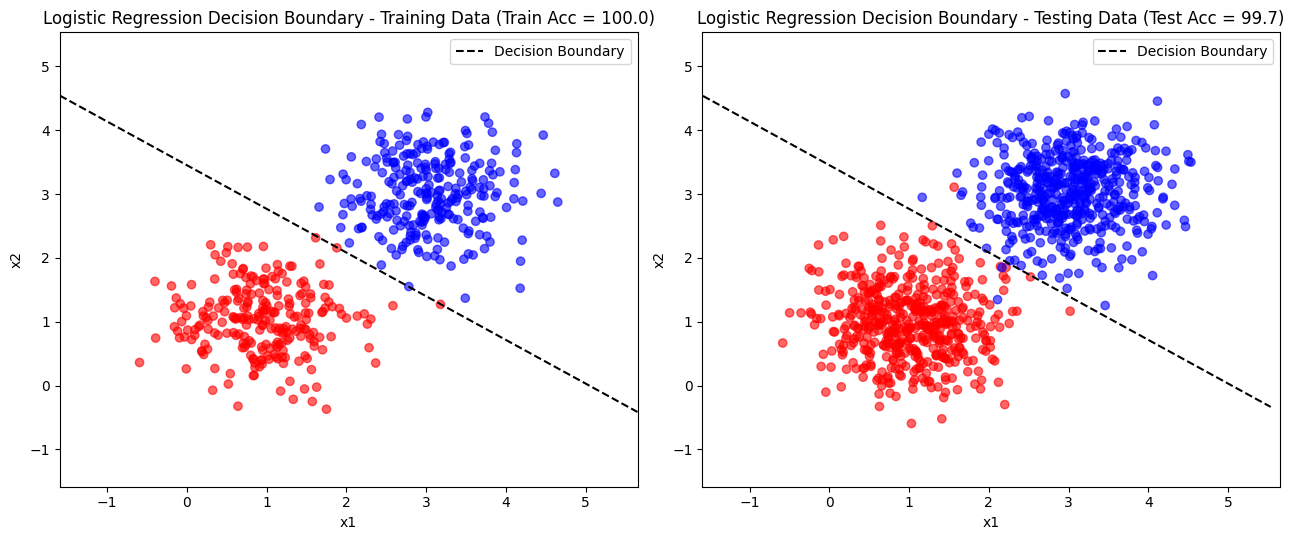



Classification of linearly Seperable data using neural networks...

Epoch:  0 Training Accuracy: 99.1358 Validation Accuracy: 99.0000 Training Error: 0.0999 Validation Error: 0.1013
Epoch:  5 Training Accuracy: 99.5556 Validation Accuracy: 98.8889 Training Error: 0.0155 Validation Error: 0.0290
Stopping early at epoch 9 due to no improvement in validation error.


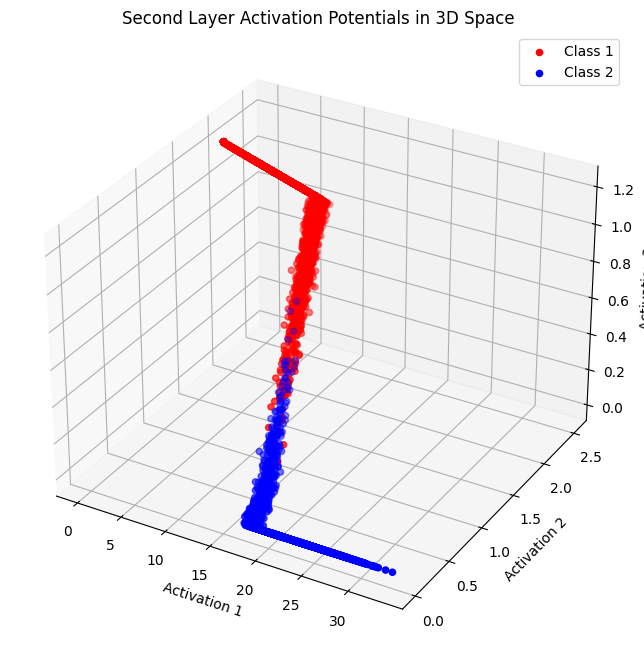


Accuracy with Neural Networks Classification: 99.4000


In [ ]:
####################################################
#Generating binary classification data (linearly separable)
####################################################

import numpy as np
import matplotlib.pyplot as plt

mean1 = [1,1]
mean2 = [3,3]
cov = [[0.3,0],[0,0.3]]
class1_tr = np.random.multivariate_normal(mean1, cov, size=(4500))
class2_tr = np.random.multivariate_normal(mean2, cov, size=(4500))

tr_data = np.concatenate([class1_tr, class2_tr], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_tr)), np.ones(len(class2_tr))])

class1_te = np.random.multivariate_normal(mean1, cov, size=(500))
class2_te = np.random.multivariate_normal(mean2, cov, size=(500))

te_data = np.concatenate([class1_te, class2_te], axis=0)
te_targets = np.concatenate([np.zeros(len(class1_te)), np.ones(len(class2_te))])

#shuffle the training data
permut = np.random.permutation(9000)
tr_data = tr_data[permut]
tr_targets = tr_targets[permut]

##################################################
#Classify the linearly separable data using linear classification models
##################################################
te_pred ,w = Logistic_Regression(tr_data[:500], tr_targets[:500], te_data)
acc = LR_Accuracy(te_targets, te_pred)
print('Accuracy with Logistic Regression:', acc, '\n')
plot_decision_boundary_logistic(tr_data[:500], tr_targets[:500], te_data,te_targets, w)

##################################################
#Classify the linearly separable data using deep neural based classification models
##################################################

print("\n\nClassification of linearly Seperable data using neural networks...\n")
tr_targets = tr_targets.reshape(9000, 1)
te_targets = te_targets.reshape(1000, 1)

batch_size = 10
epochs = 100
train_val_split = 0.9
learning_rate = 0.001
patience = 5
min_delta = 0.01
weights, biases = training(tr_data, tr_targets,False,batch_size,epochs,train_val_split,learning_rate, ReLu, gradReLu, patience, min_delta)

#Testing
test_pred = fwdPropagate(te_data, weights, biases, ReLu)[-1]
test_err = computeBinaryCrossEntropyLoss(test_pred, te_targets)
test_pred = np.where(test_pred > 0.5, 1, 0)
test_accuracy = np.mean(test_pred == te_targets)
print("\nAccuracy with Neural Networks Classification: {:.4f}".format(test_accuracy*100))


### Classification on non-linearly seperabe data

Accuracy with Logistic Regression: 50.0 



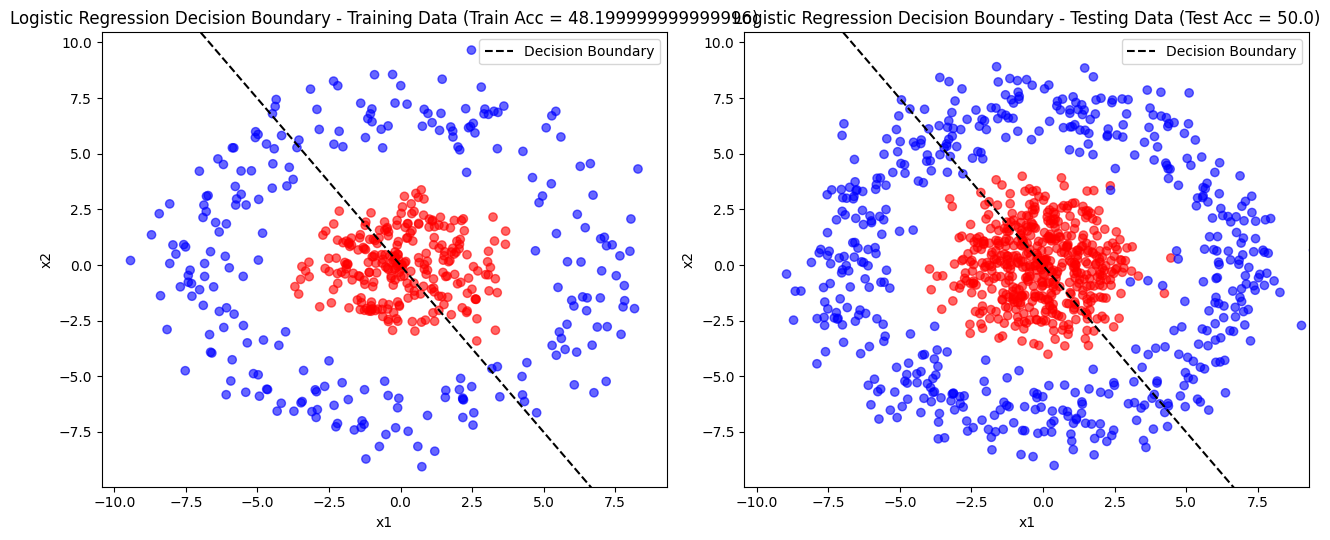



Classification of linearly Seperable data using neural networks...

Epoch:  0 Training Accuracy: 85.4321 Validation Accuracy: 84.1111 Training Error: 0.4082 Validation Error: 0.4076
Epoch:  5 Training Accuracy: 99.0864 Validation Accuracy: 99.3333 Training Error: 0.0369 Validation Error: 0.0340
Epoch:  10 Training Accuracy: 99.1605 Validation Accuracy: 99.5556 Training Error: 0.0244 Validation Error: 0.0203
Stopping early at epoch 11 due to no improvement in validation error.


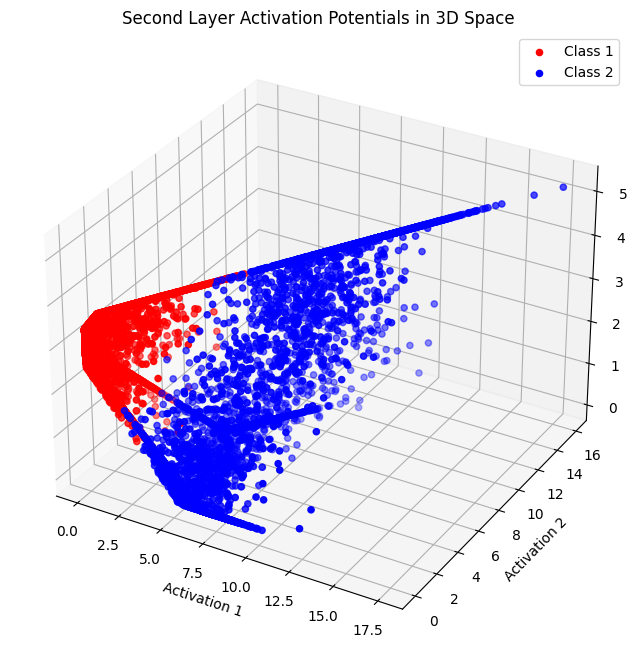


Accuracy with Neural Networks Classification: 99.2000


In [ ]:
##################################################
#Generating binary classification data (non-linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

# Function to generate data for concentric circles
def generate_concentric_data(n_samples, radius1,radius2, noise_std):
    # Generate random angles
    angles = np.random.rand(n_samples) * 2 * np.pi
    noise = noise_std*np.random.randn(n_samples)
    # Generate inner and outer circles
    inner_circle = np.array([(radius1 + noise) * np.cos(angles), (radius1 + noise) * np.sin(angles)]).T
    outer_circle = np.array([(radius2 + noise) * np.cos(angles), (radius2 + noise) * np.sin(angles)]).T
    return inner_circle, outer_circle

# Generate data for two classes
n_samples = 5000  # Number of samples for each class
radius1 = 2  # Radius of inner circle
radius2 = 7  # Radius of inner circle
noise_std = 1   # Noise to be added to radius

class1_data, class2_data = generate_concentric_data(n_samples, radius1,radius2,noise_std)

# Generate labels for the data
n_tr = 4500
n_te = 500

tr_data = np.concatenate([class1_data[:n_tr, :], class2_data[:n_tr, :]], axis=0)
tr_targets = np.concatenate([np.zeros(n_tr), np.ones(n_tr)])


te_data = np.concatenate([class1_data[n_tr:, :], class2_data[n_tr:, :]], axis=0)
te_targets = np.concatenate([np.zeros(n_te), np.ones(n_te)])

#shuffle the training data
permut = np.random.permutation(9000)
tr_data = tr_data[permut]
tr_targets = tr_targets[permut]

te_data.shape, te_targets.shape


##################################################
#Classify the non-linearly separable data using linear classification models
##################################################
te_pred ,w = Logistic_Regression(tr_data[:500], tr_targets[:500], te_data)
acc = LR_Accuracy(te_targets, te_pred)
print('Accuracy with Logistic Regression:', acc, '\n')
plot_decision_boundary_logistic(tr_data[:500], tr_targets[:500], te_data,te_targets, w)


##################################################
#Classify the non-linearly separable data using deep neural based classification models
##################################################
print("\n\nClassification of linearly Seperable data using neural networks...\n")

tr_targets = tr_targets.reshape((9000,1))
te_targets = te_targets.reshape((1000,1))

batch_size = 10
epochs = 50
train_val_split = 0.9
learning_rate = 0.001
patience = 5
min_delta = 0.01
weights, biases = training(tr_data, tr_targets,False,batch_size,epochs,train_val_split,learning_rate, ReLu, gradReLu, patience, min_delta)

#Testing
test_pred = fwdPropagate(te_data, weights, biases, ReLu)[-1]
test_err = computeBinaryCrossEntropyLoss(test_pred, te_targets)
test_pred = np.where(test_pred > 0.5, 1, 0)
test_accuracy = np.mean(test_pred == te_targets)
print("\nAccuracy with Neural Networks Classification: {:.4f}".format(test_accuracy*100))


### Observations for Linearly Separable Data:

*   **Accuracy with Logistic Regression**: 99.8%
*   **Accuracy with Neural Network Classification**: 99.5%

The performance of both logistic regression and neural networks is very high for linearly separable data.

**Reasoning**: For linearly separable data, logistic regression performs exceptionally well as it is inherently a linear classifier. It's designed to find an optimal linear boundary when such a boundary exists. Neural networks are equally capable of achieving high accuracy on linearly separable data, potentially matching or even surpassing logistic regression. However, the neural network's performance may vary slightly depending on factors like the number of epochs it was trained for or the specific initializations of its weights.

### Observations for Non-Linearly Separable Data:

*   **Accuracy with Logistic Regression**: 49.6%
*   **Accuracy with Neural Network Classification**: 98.4%

For non-linearly separable data, the neural network significantly outperforms logistic regression.

**Reasoning**: Logistic regression struggles with non-linearly separable data because it can only model a linear decision boundary. This explains the accuracy close to 50%, which is equivalent to random guessing in a binary classification task. On the other hand, neural networks excel in these scenarios because they can learn complex, non-linear decision boundaries, as demonstrated by the high accuracy achieved.

**Additional Points**:

*   The plots clearly illustrate the distinction between linear and non-linear decision boundaries. For the linearly separable data, the logistic regression boundary aligns closely with the actual separation of the classes, leading to high accuracy.
*   In the non-linear case, the logistic regression boundary cannot conform to the data distribution, resulting in poor performance.
*   The neural network's flexibility allows it to approximate the non-linear boundary effectively, thus classifying the non-linearly separable data with high accuracy.


